In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
data=pd.read_csv('INX_Future_Inc_Employee_Performance.csv')

In [3]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
# checking the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [5]:
# fetching numerical column
num_data=data.select_dtypes(include=['int64'])
num_data.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [6]:
# fetching categorical column
cat_data=data.select_dtypes(include=['object'])
cat_data.columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

## Top 3 Important Factors Impacting Employee Performance

## Random Forest Classifier
A Random Forest Classifier is an ensemble machine learning model that selects important features by repeatedly splitting data into subsets and building decision trees. It assesses feature importance by measuring the decrease in model accuracy when each feature is removed or varied, helping identify the most influential predictors.

In [7]:
x_smote=pd.read_csv('Trained_feature_INX_Future_data.csv')
y_smote=pd.read_csv('Train_label_INX_Future_data.csv')

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(x_smote, y_smote)

# Get feature importance scores
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': x_smote.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 3 features
top_3_features = feature_importance_df.head(3)

# Print the top 3 important features
print("Top 3 Important Features:")
print(top_3_features)

Top 3 Important Features:
                       Feature  Importance
14    EmpLastSalaryHikePercent    0.146096
7   EmpEnvironmentSatisfaction    0.098208
20     YearsSinceLastPromotion    0.078993


## TOP THREE FEATURES IMPACTING EMPLOYEE PERFORMANCE ARE

* EmpLastSalaryHikePercent
* EmpEnvironmentSatisfaction
* YearsSinceLastPromotion

# Department wise Performance Analysis

In department-wise performance analysis, the data needs to be segmented or sliced by each department category. The data frame should be separated according to the departments available, which include:

* Sales
* Human Resources
* Development
* Data Science
* Research & Development
* Finance

For this analysis, we have selected six important input features to assess performance ratings within each department:

* EmpLastSalaryHike Percent
* EmpEnvironmentSatisfaction
* YearsSinceLastPromotion
* Total work experience in years
* ExperienceYearsAtThisCompany
* ExperienceYearsInCurrentRole

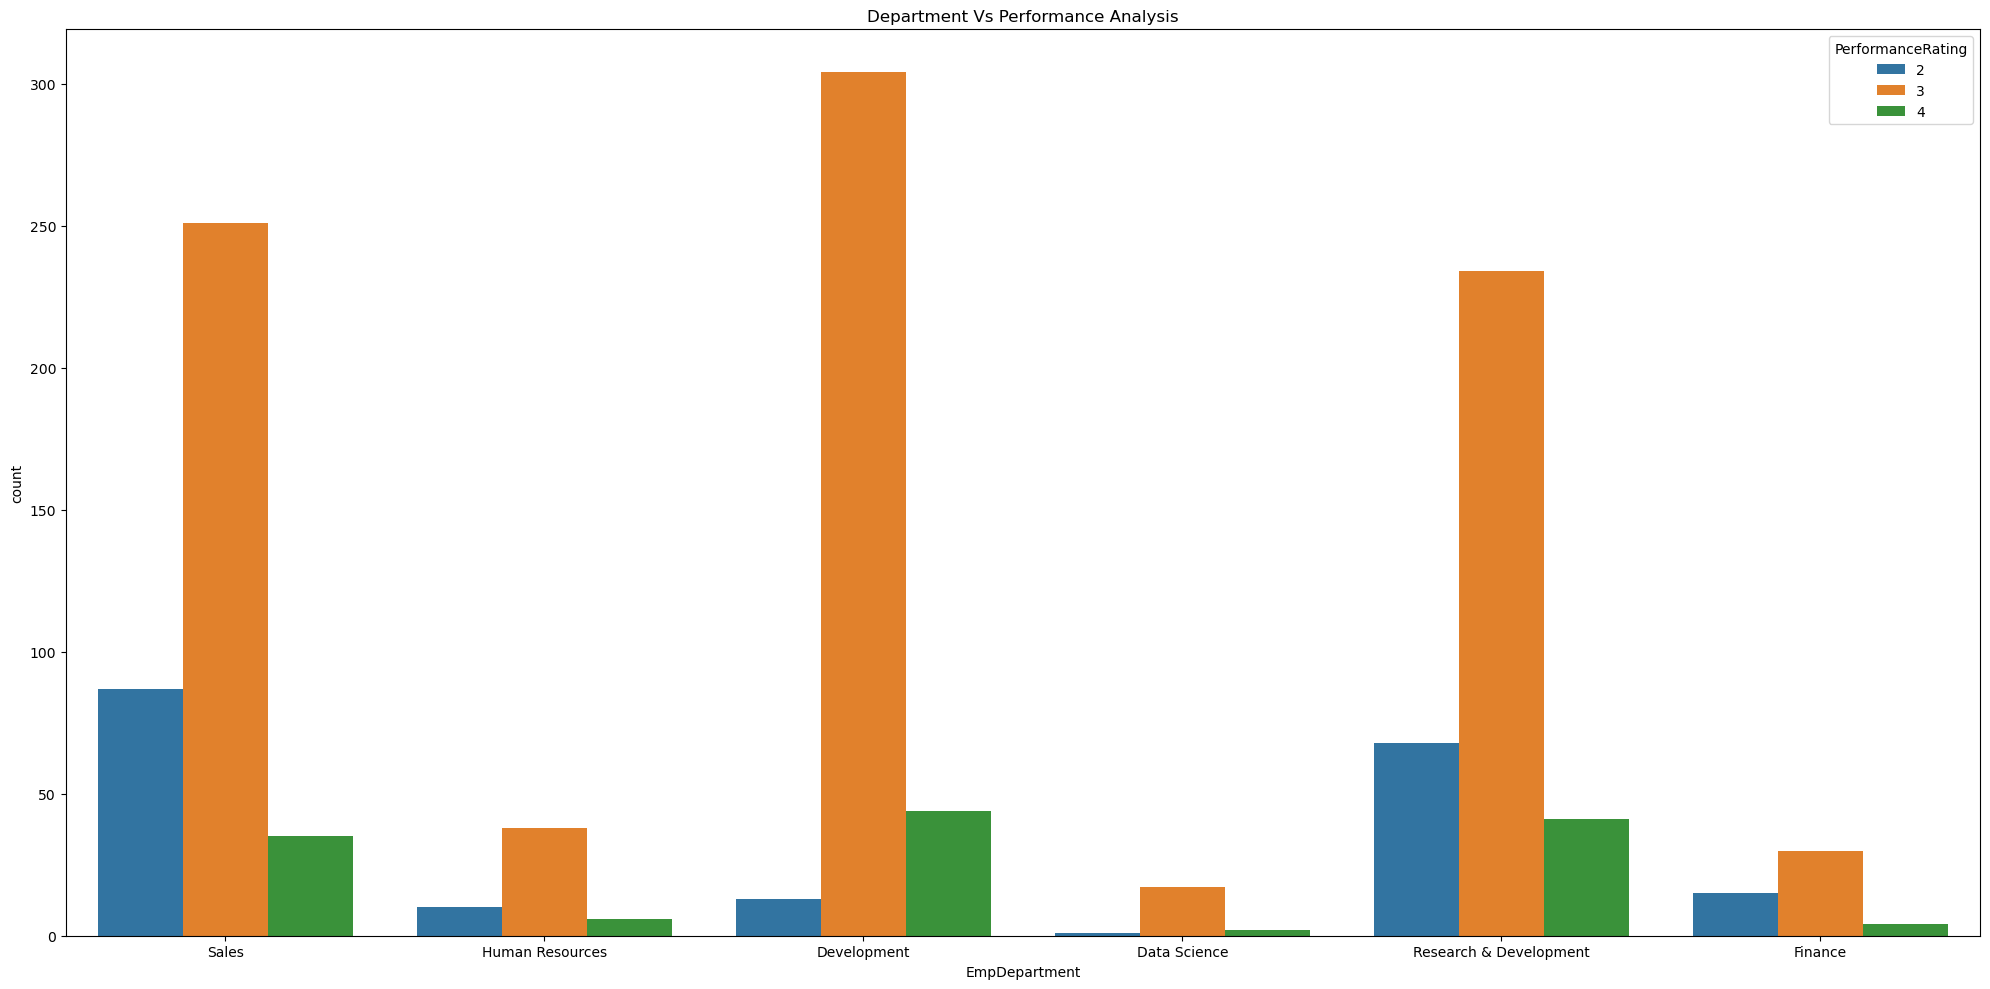

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x=data['EmpDepartment'],hue=data['PerformanceRating'])
plt.title('Department Vs Performance Analysis')
plt.tight_layout()

* 2-Good,
* 3-Excellent,
* 4-Outstanding.

## Sales Department

In [10]:
# fetching sales department from the data
sales = data[data.EmpDepartment == 'Sales'] 
Dept1=sales.PerformanceRating.value_counts()
sales.PerformanceRating.value_counts()

3    251
2     87
4     35
Name: PerformanceRating, dtype: int64

## Performance Rating with respect to Number of Employees

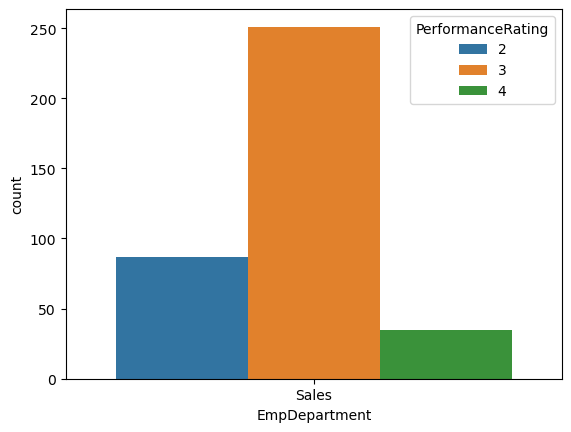

In [11]:
sns.countplot(data=sales,x=sales['EmpDepartment'],hue=sales['PerformanceRating']);

## Insights

* In Sales Department, 351 employees performance are Excellent.
* 81 employees performance was good.
* 35 employees performance are outstanding in sales department.

## Performance Rating with respect to EmpLastSalaryHike Percent

Text(0.5, 1.0, 'EmpLastSalaryHikePercent by Performance Rating')

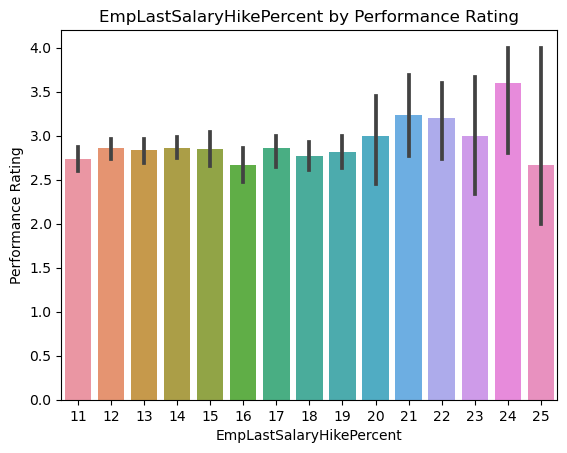

In [12]:
sns.barplot(x=sales['EmpLastSalaryHikePercent'], y=sales['PerformanceRating'])
plt.xlabel('EmpLastSalaryHikePercent')
plt.ylabel('Performance Rating')
plt.title('EmpLastSalaryHikePercent by Performance Rating')

### Insights
* In the Sales department, employees who received higher salary hikes generally had excellent performance ratings, while those with lower salary hike percentages tended to have good performance.

## Performance Rating with respect to EmpEnvironmentSatisfaction

Text(0.5, 1.0, 'EmpEnvironmentSatisfaction by Performance Rating')

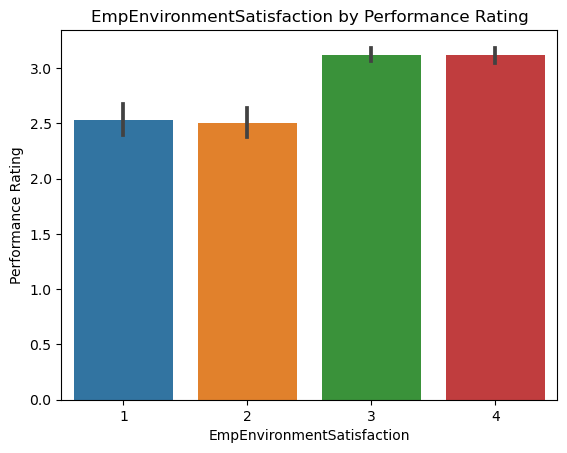

In [13]:
sns.barplot(x=sales['EmpEnvironmentSatisfaction'], y=sales['PerformanceRating'])
plt.xlabel('EmpEnvironmentSatisfaction')
plt.ylabel('Performance Rating')
plt.title('EmpEnvironmentSatisfaction by Performance Rating')

### Insights:
* Employees who have high or very high satisfaction with their work environment tend to have excellent performance ratings, while those with low or medium environment satisfaction typically exhibit good performance.

## Performance Rating with respect to YearsSinceLastPromotion

Text(0.5, 1.0, 'YearsSinceLastPromotion by Performance Rating')

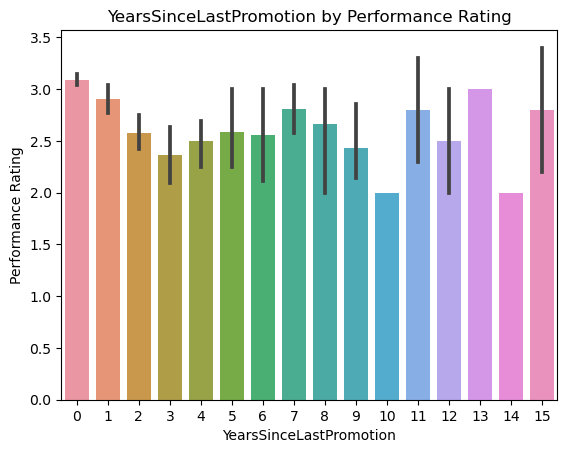

In [14]:
sns.barplot(x=sales['YearsSinceLastPromotion'], y=sales['PerformanceRating'])
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Performance Rating')
plt.title('YearsSinceLastPromotion by Performance Rating')

### Insights:
* In the Sales department, employees who were recently promoted demonstrated excellent performance.

* Conversely, employees in the Sales department who have not been promoted for more than 10 years exhibited good performance.

## Performance Rating with respect to Experience Level

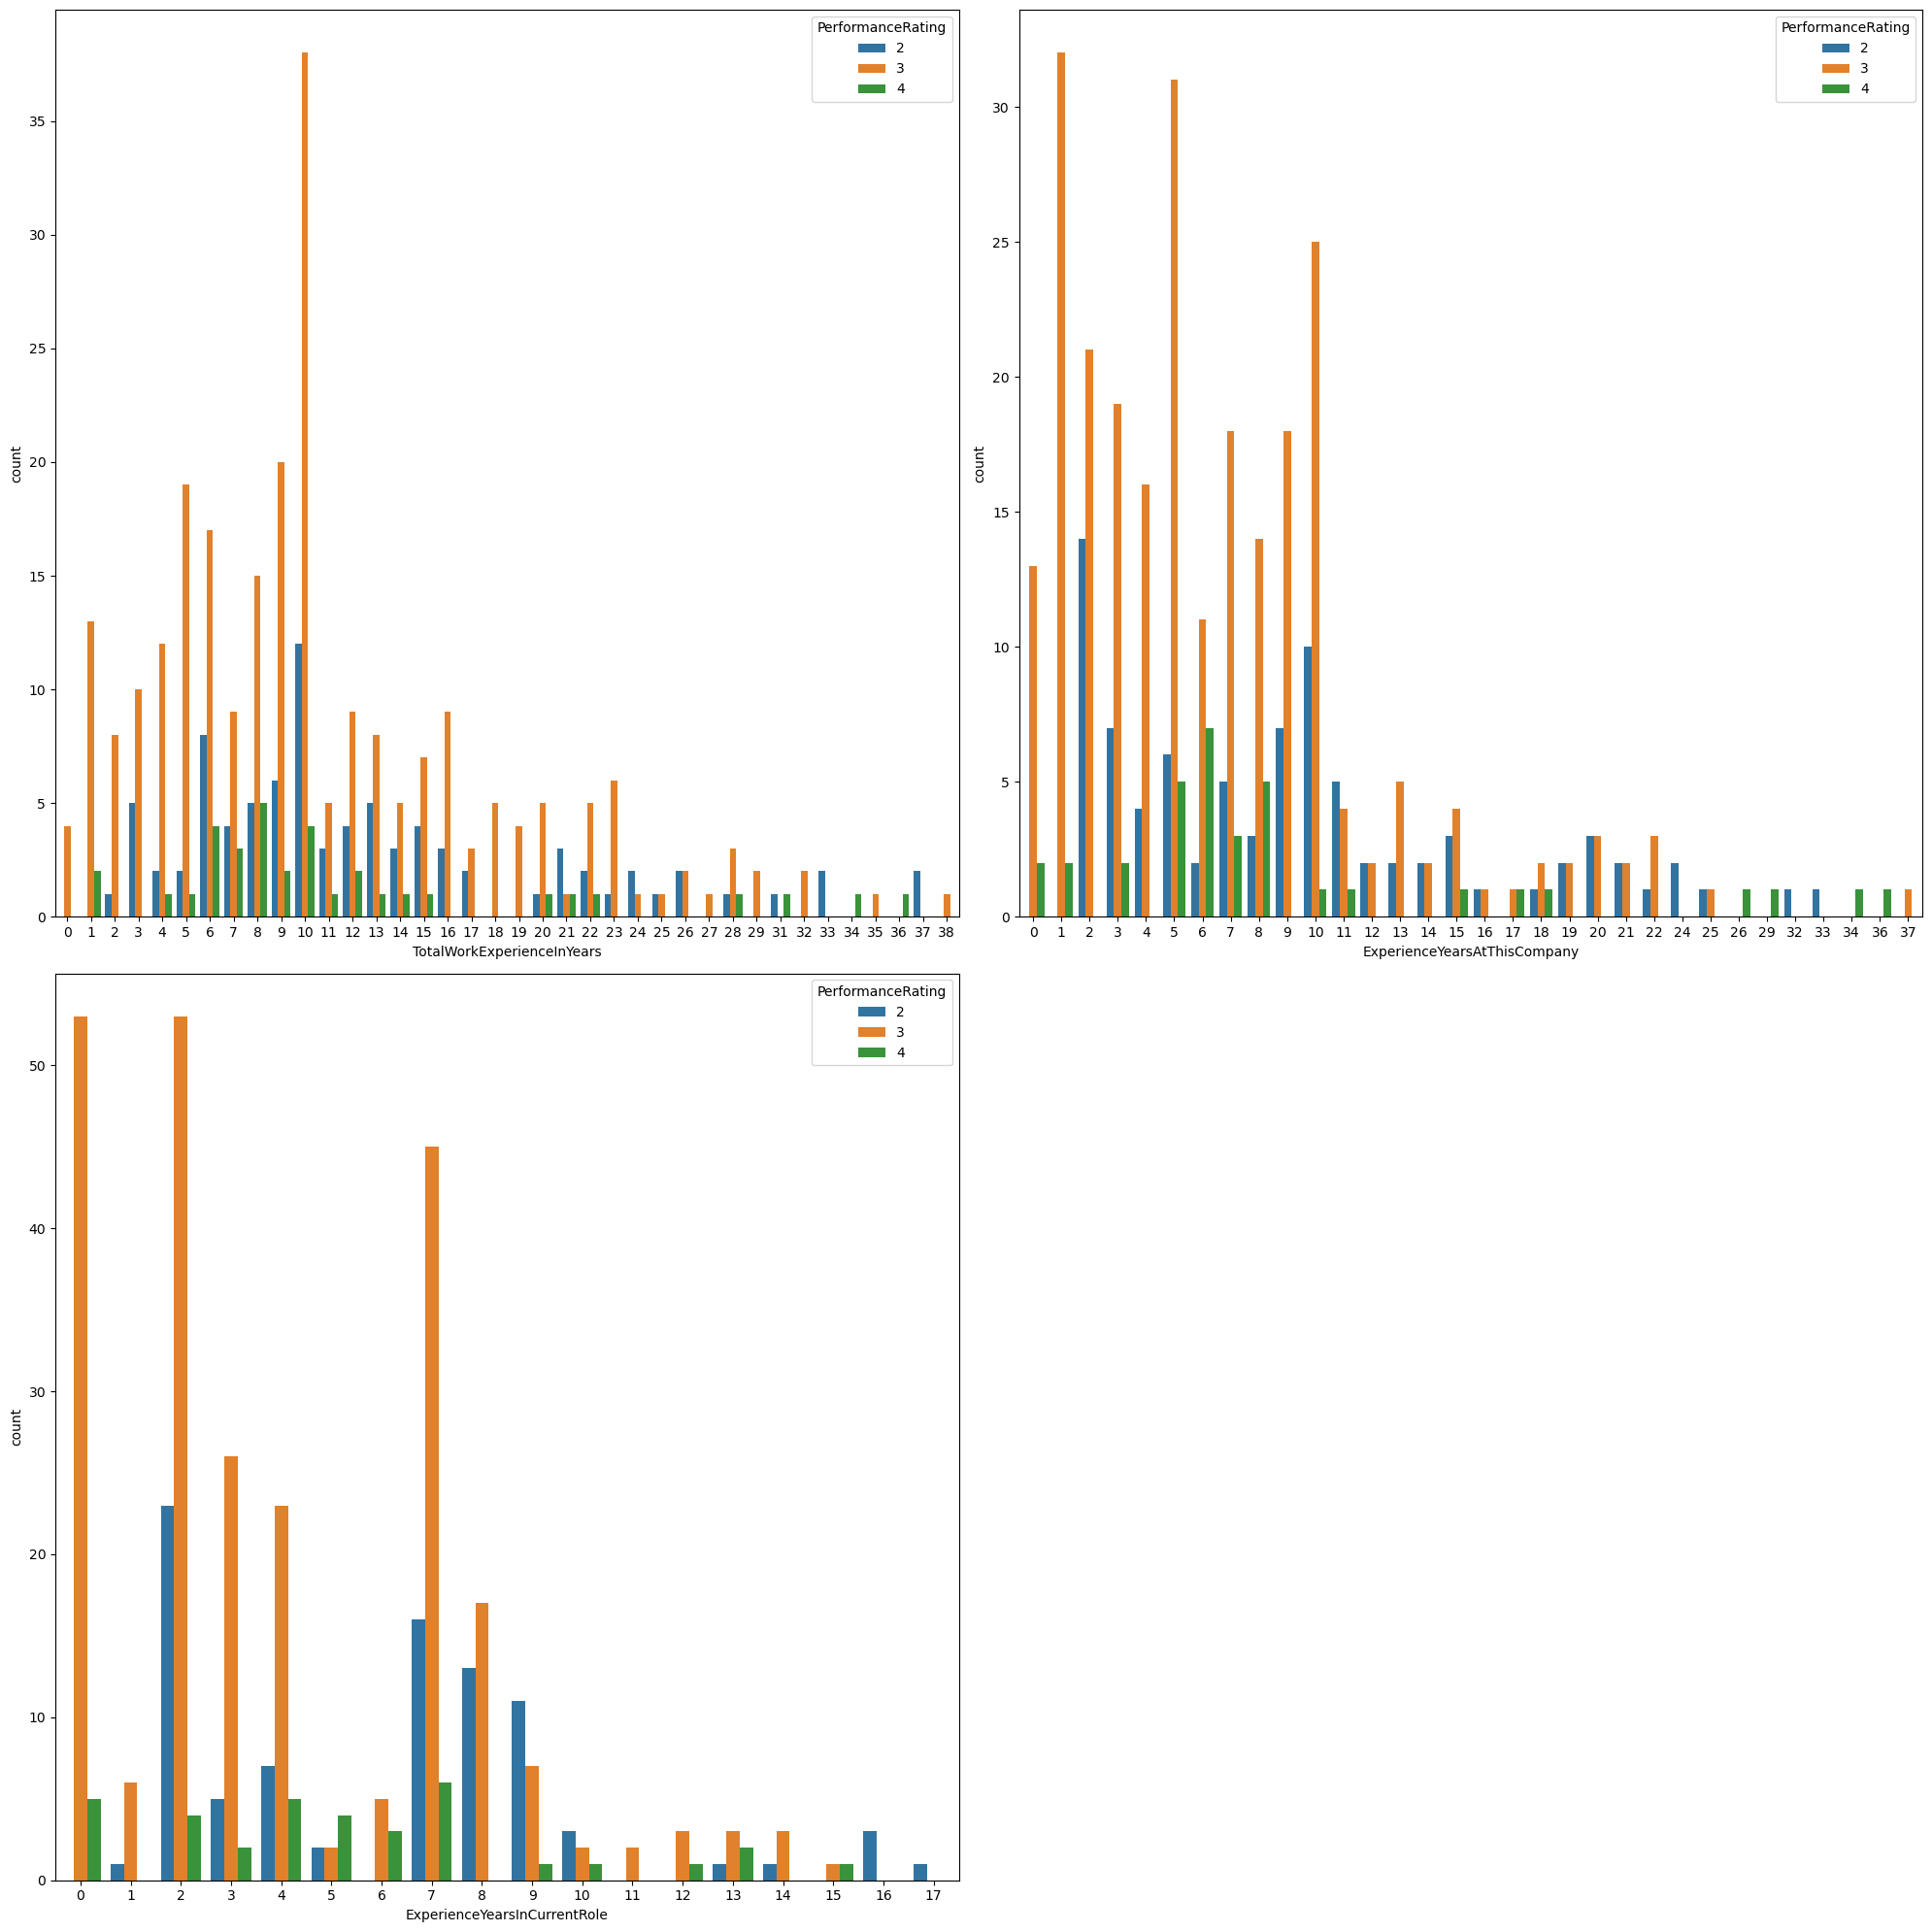

In [15]:
experience=sales[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole']]
plt.figure(figsize=(20,20))
plotnumber=1
for i in experience:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(data=experience,x=sales[i],hue=sales['PerformanceRating'])
    plotnumber+=1
plt.tight_layout() 
    


### Insights:
* Total work experience in years: Employees with 1 to 15 years of work experience have demonstrated excellent and outstanding performance, while employees with more than 15 years of experience tend to have lower performance levels.

* Experience years at this company: Employees who have been with the company for less than 12 years tend to exhibit outstanding and excellent performance.

* Experience years in the current role: Employees who have been in their current role for less than 7 years tend to show excellent and outstanding performance compared to those who have been in the role for more than 7 years.

## Human Resource Department

In [16]:
## fetching HR department from data
HR = data[data.EmpDepartment == 'Human Resources'] 
Dept2=HR.PerformanceRating.value_counts()
HR.PerformanceRating.value_counts()

3    38
2    10
4     6
Name: PerformanceRating, dtype: int64

## Performance Rating with respect to Number of Employees

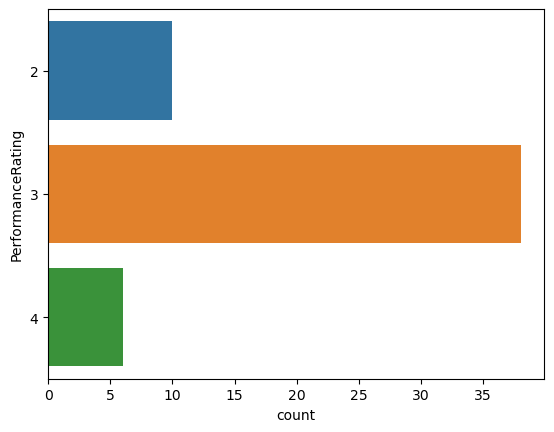

In [17]:
sns.countplot(y="PerformanceRating", data=HR);

### Insights:
* In HR department 38 employees performance are excellent, 6 employees were done outstanding performance and 10 employees performance was good.

## Performance Rating with respect to EmpLastSalaryHike Percent

Text(0.5, 1.0, 'EmpLastSalaryHikePercent by Performance Rating')

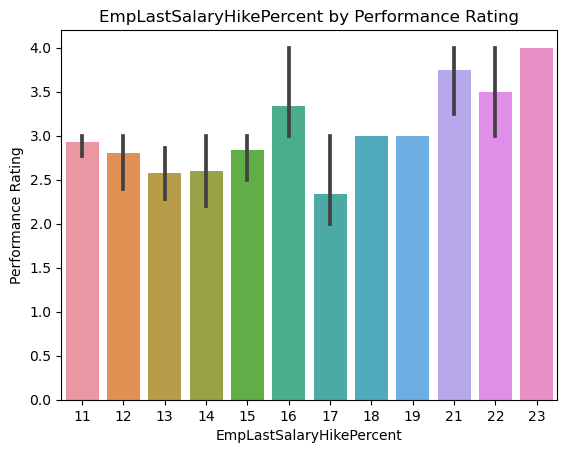

In [18]:
sns.barplot(x=HR['EmpLastSalaryHikePercent'], y=HR['PerformanceRating'])
plt.xlabel('EmpLastSalaryHikePercent')
plt.ylabel('Performance Rating')
plt.title('EmpLastSalaryHikePercent by Performance Rating')

### Insights:
* In the HR department, employees who received higher salary hikes demonstrated outstanding performance.

* Conversely, employees with lower salary hikes had good performance ratings.

* Therefore, it can be observed that higher salary hikes are associated with increased performance.

## Performance Rating with respect to EmpEnvironmentSatisfaction

Text(0.5, 1.0, 'EmpEnvironmentSatisfaction by Performance Rating')

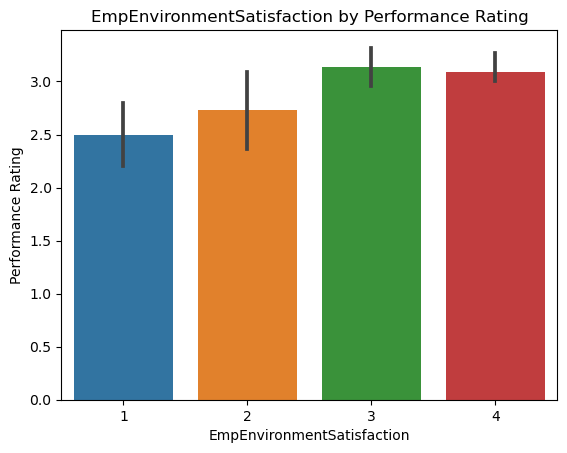

In [19]:
sns.barplot(x=HR['EmpEnvironmentSatisfaction'], y=HR['PerformanceRating'])
plt.xlabel('EmpEnvironmentSatisfaction')
plt.ylabel('Performance Rating')
plt.title('EmpEnvironmentSatisfaction by Performance Rating')

### Insights:
* In the HR department, employees who are highly satisfied with their work environment also have high performance ratings.

* Conversely, employees with low satisfaction tend to have lower performance ratings.

## Performance Rating with respect to YearsSinceLastPromotion

Text(0.5, 1.0, 'YearsSinceLastPromotion by Performance Rating')

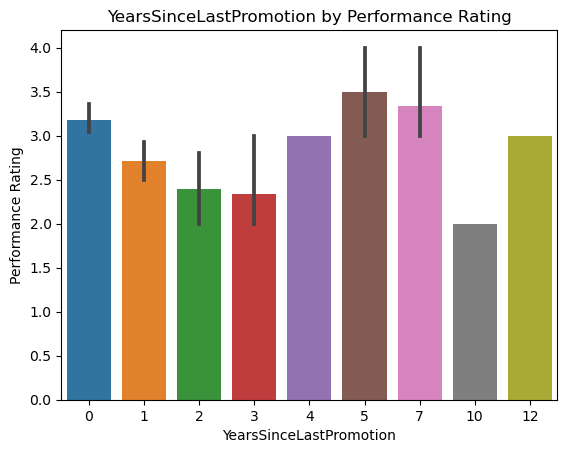

In [20]:
sns.barplot(x=HR['YearsSinceLastPromotion'], y=HR['PerformanceRating'])
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Performance Rating')
plt.title('YearsSinceLastPromotion by Performance Rating')

### Insights:
* Employees who were promoted 5 to 7 years ago demonstrated excellent performance.

* Employees who were recently promoted exhibited excellent performance.

* Employees who were promoted more than 10 years ago had lower performance.

## Performance Rating with respect to Experience Level

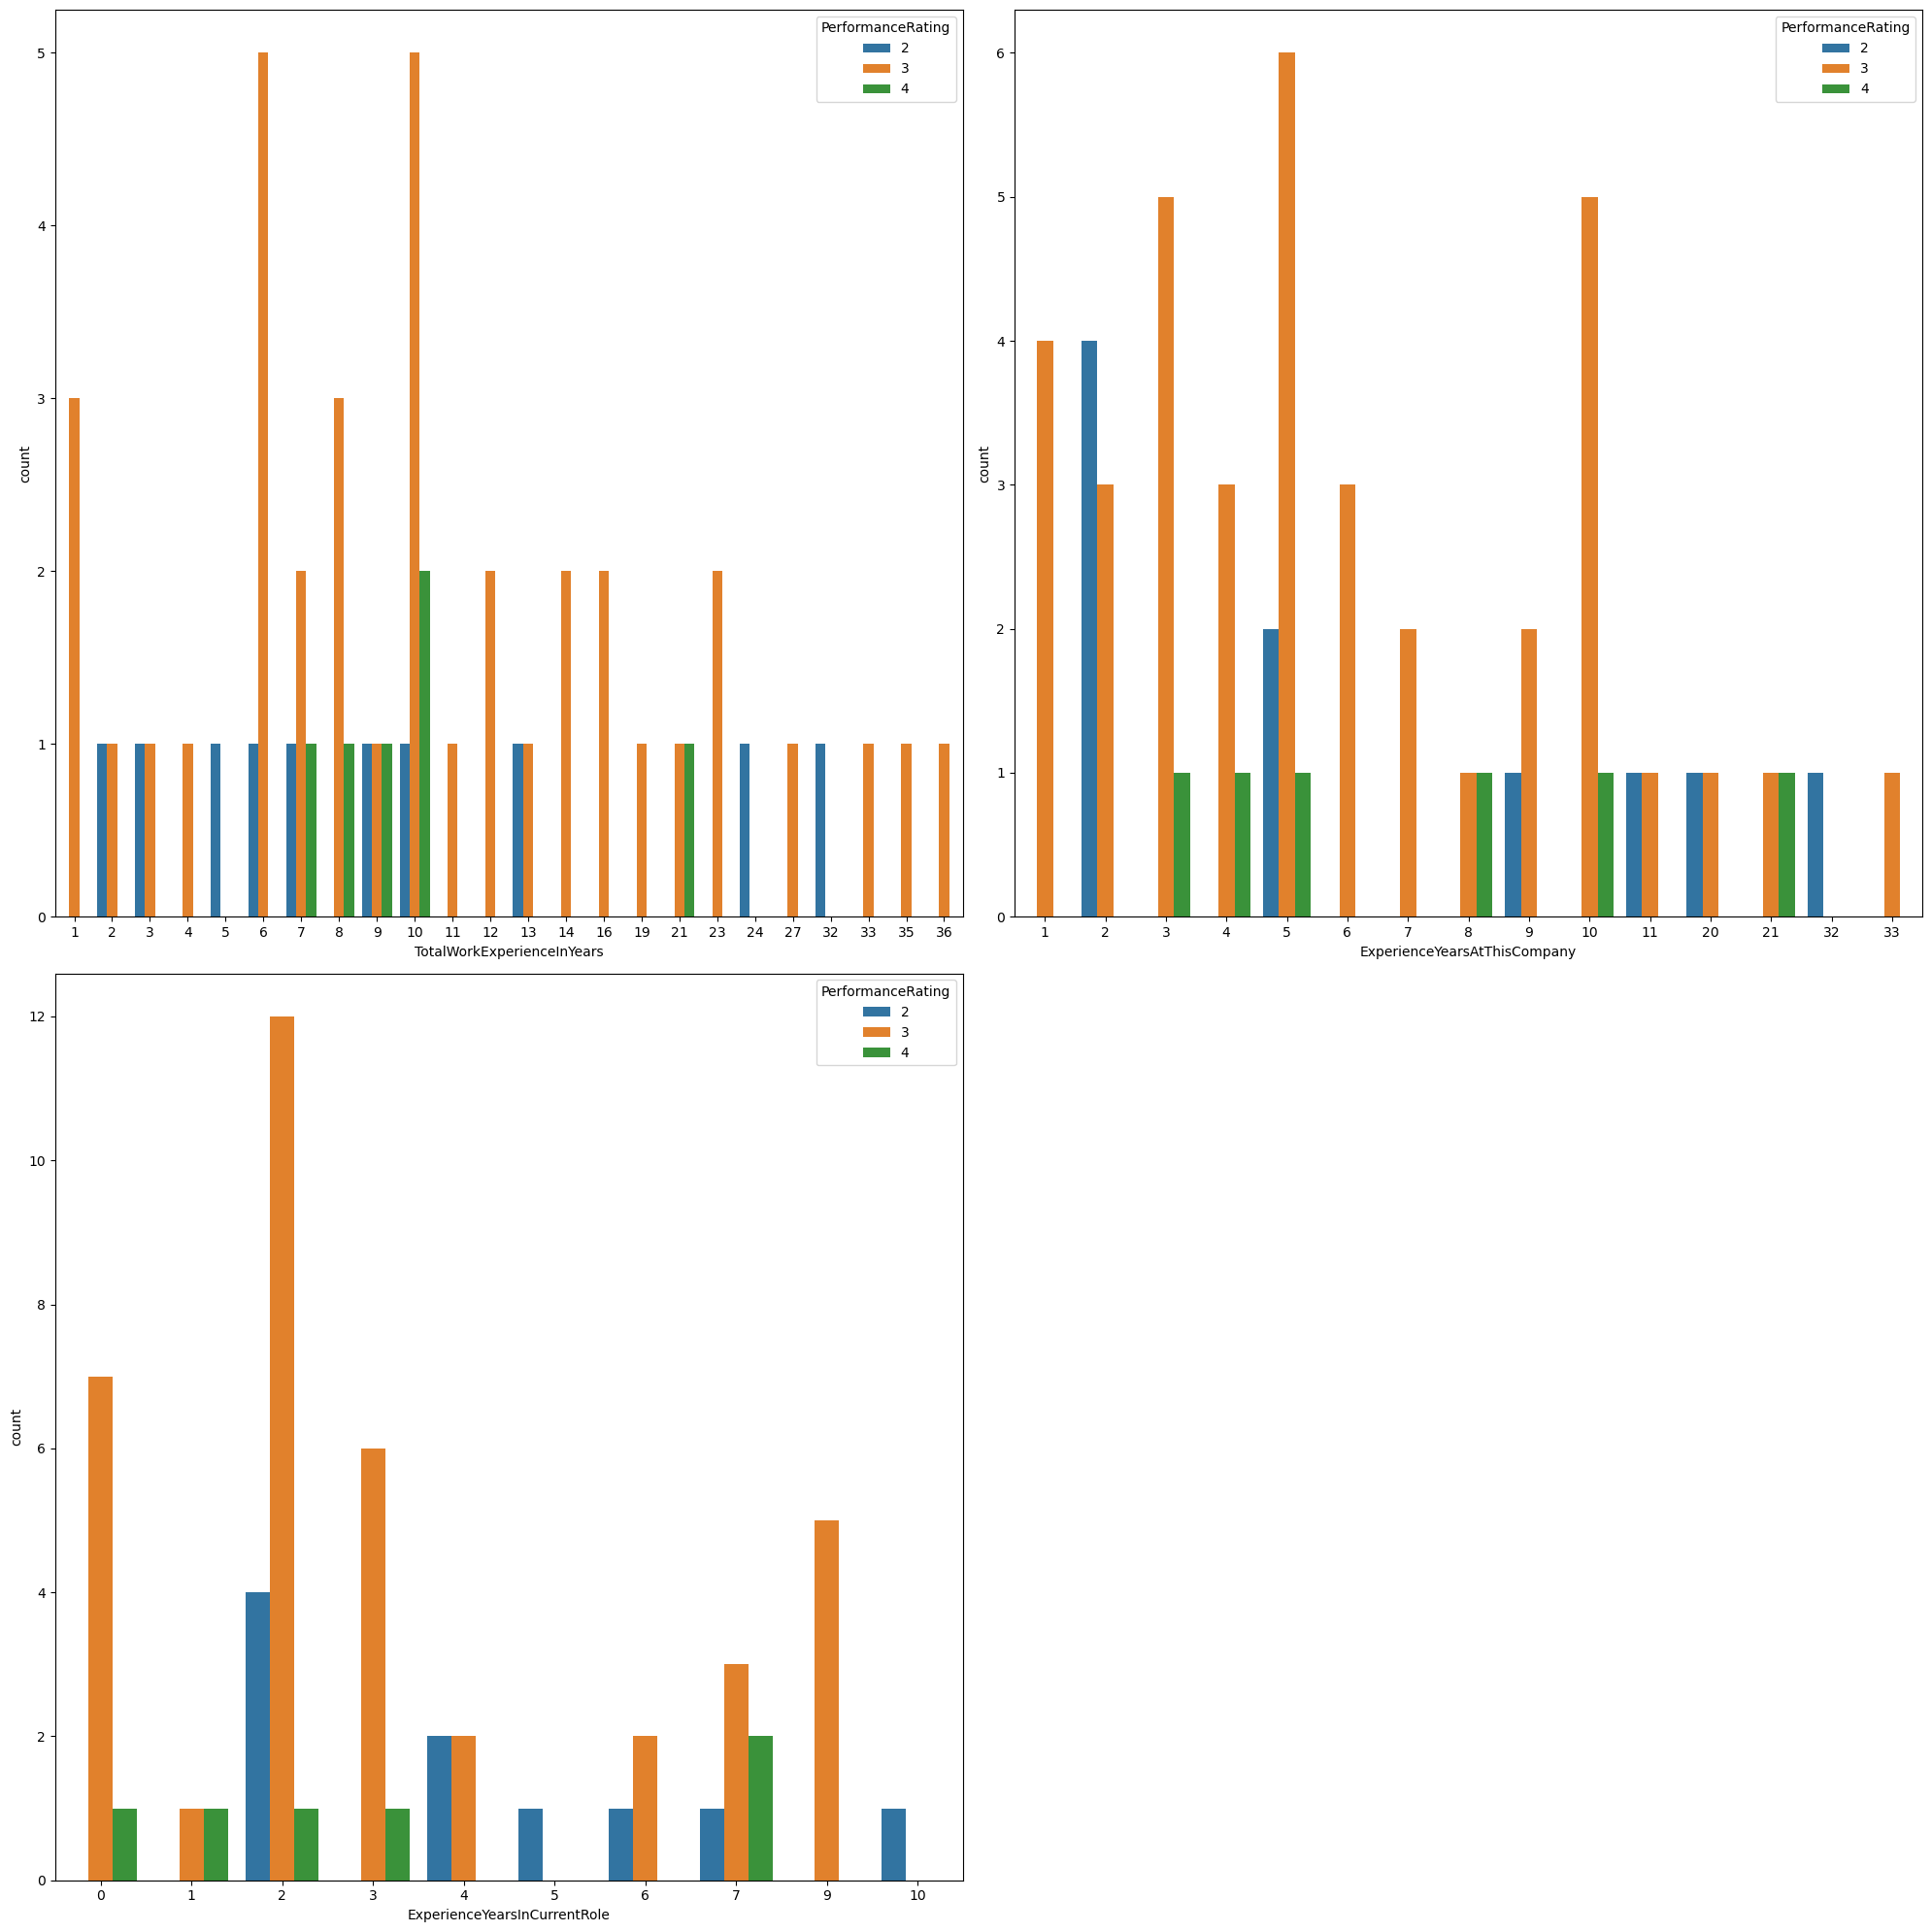

In [21]:
experience=HR[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole']]
plt.figure(figsize=(20,20))
plotnumber=1
for i in experience:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(data=experience,x=HR[i],hue=HR['PerformanceRating'])
    plotnumber+=1
plt.tight_layout() 

## Insights:
* Total work experience in years: Within the HR department, employees with 7 to 10 years of experience consistently demonstrate outstanding and excellent performance.

* Experience years at this company: Employees who have been with the company for 3 to 5 years consistently exhibit outstanding performance. However, employees with less than 3 years of experience at the company tend to have lower performance levels.

* Experience years in the current role: Employees with less than 3 years of experience in their current role tend to achieve outstanding performance compared to their more experienced counterparts.

## Development Department

In [22]:
# fetching Development department from data
Development = data[data.EmpDepartment == 'Development']  
Dept3=Development.PerformanceRating.value_counts()
Development.PerformanceRating.value_counts()

3    304
4     44
2     13
Name: PerformanceRating, dtype: int64

## Performance Rating with respect to Number of Employees¶

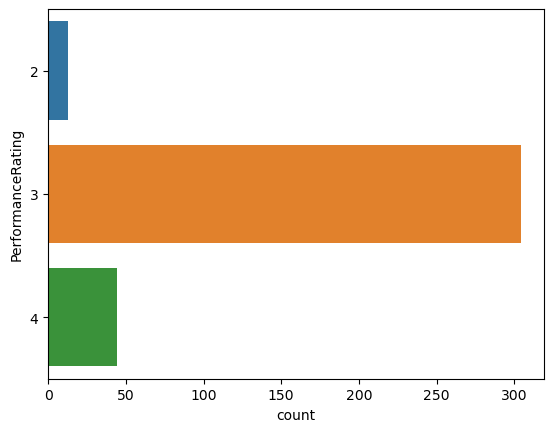

In [23]:
sns.countplot(y="PerformanceRating", data=Development);

### Insights:
* In Development department, 304 employees performance was excellent, 44 employees having outstanding performance.
* 13 employees performance was good.

## Performance Rating with respect to EmpLastSalaryHike Percent

Text(0.5, 1.0, 'EmpLastSalaryHikePercent by Performance Rating')

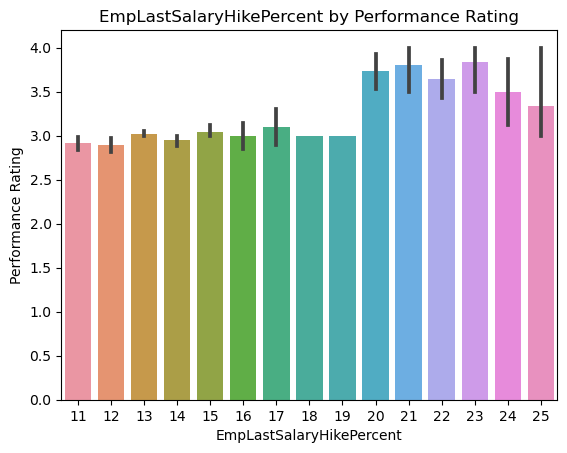

In [24]:
sns.barplot(x=Development['EmpLastSalaryHikePercent'], y=Development['PerformanceRating'])
plt.xlabel('EmpLastSalaryHikePercent')
plt.ylabel('Performance Rating')
plt.title('EmpLastSalaryHikePercent by Performance Rating')

### Insights:
* In Development department, as the salary hike percent increases the employee performance also increases.

## Performance Rating with respect to EmpEnvironmentSatisfaction

Text(0.5, 1.0, 'EmpEnvironmentSatisfaction by Performance Rating')

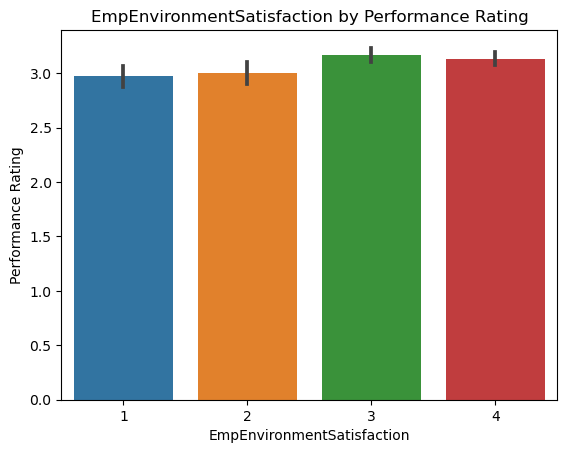

In [25]:
sns.barplot(x=Development['EmpEnvironmentSatisfaction'], y=Development['PerformanceRating'])
plt.xlabel('EmpEnvironmentSatisfaction')
plt.ylabel('Performance Rating')
plt.title('EmpEnvironmentSatisfaction by Performance Rating')

### Insights:
* In the Development department, the majority of employees exhibited excellent performance, regardless of whether they were highly satisfied or less satisfied with their work environment.

## Performance Rating with respect to YearsSinceLastPromotion

Text(0.5, 1.0, 'YearsSinceLastPromotion by Performance Rating')

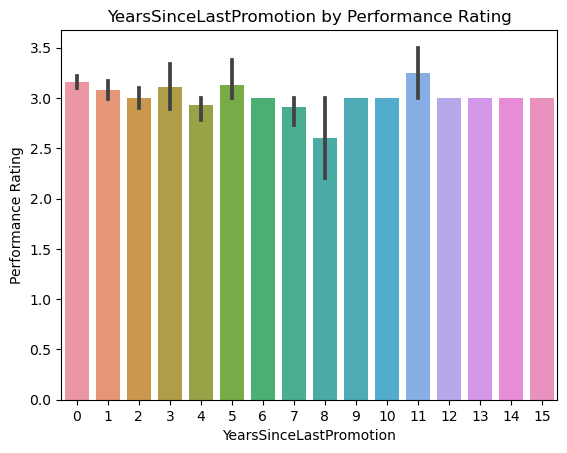

In [26]:
sns.barplot(x=Development['YearsSinceLastPromotion'], y=Development['PerformanceRating'])
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Performance Rating')
plt.title('YearsSinceLastPromotion by Performance Rating')

### Insights:
* In the Development department, most employees exhibited excellent performance regardless of the years since their last promotion

## Performance Rating with respect to Experience Level

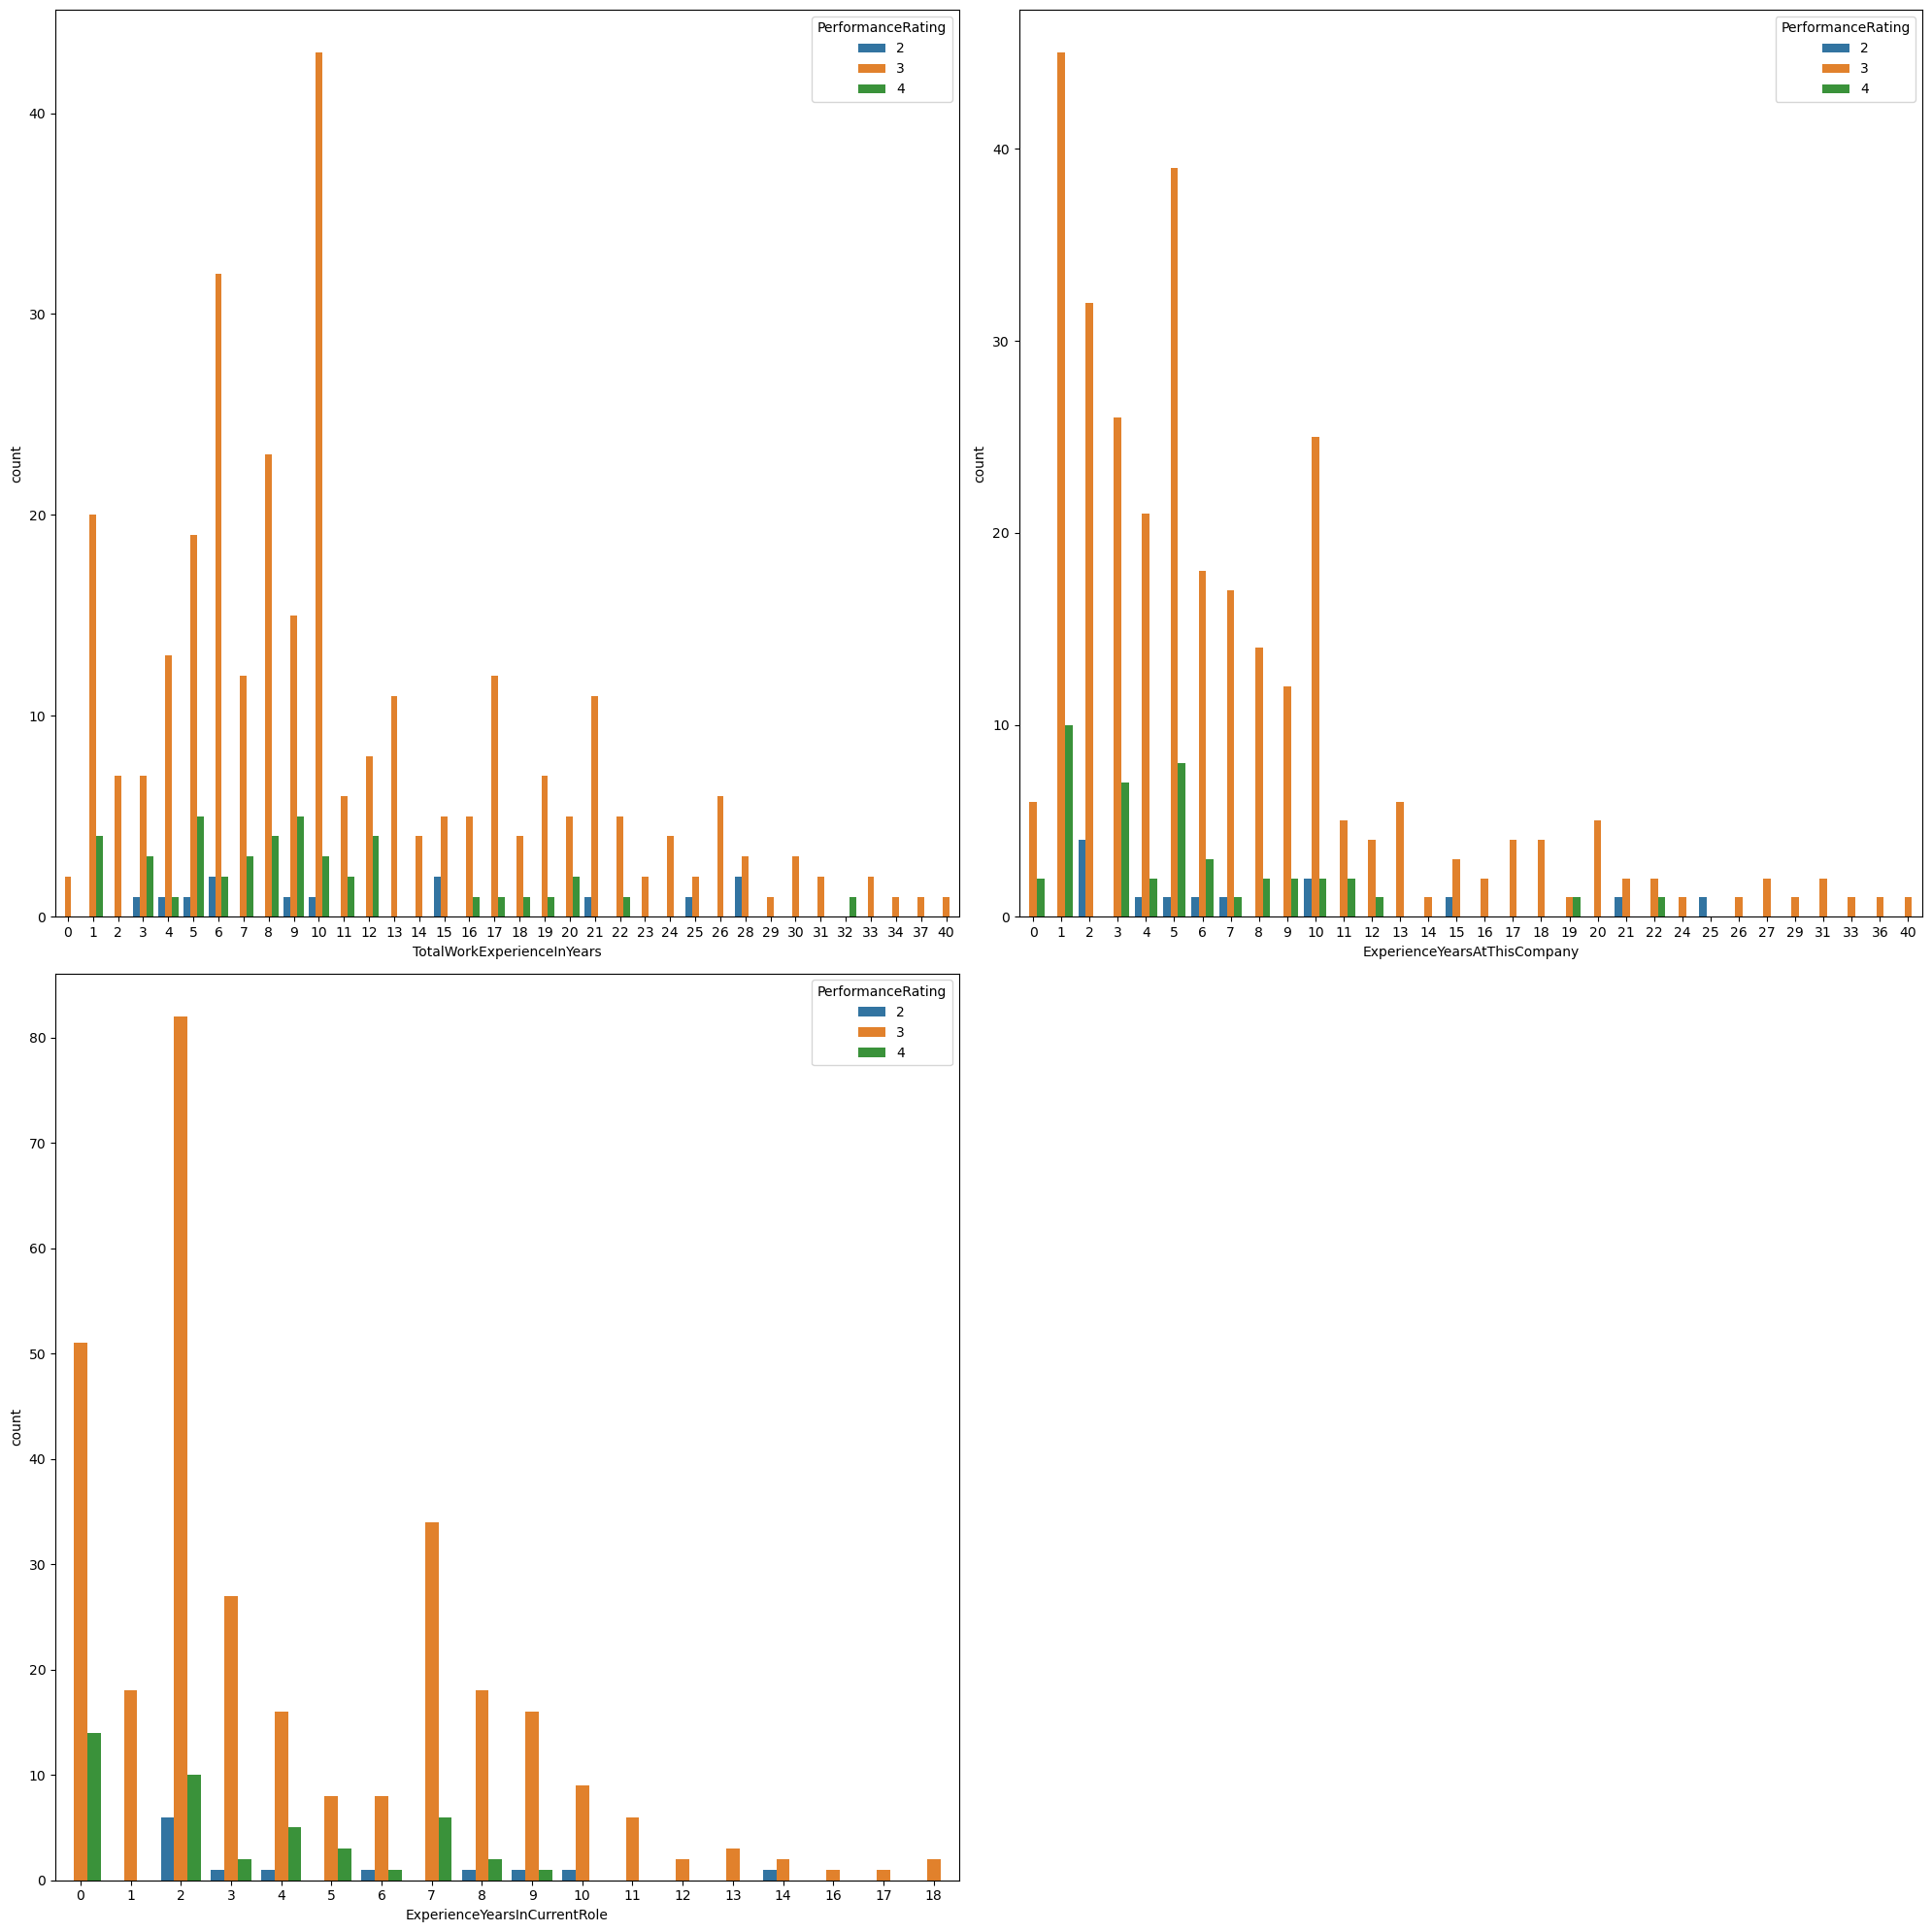

In [27]:
experience=Development[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole']]
plt.figure(figsize=(20,20))
plotnumber=1
for i in experience:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(data=experience,x=Development[i],hue=Development['PerformanceRating'])
    plotnumber+=1
plt.tight_layout() 

## Insights:
* Total work experience in years: Within the Development department, employees with 1 to 12 years of experience consistently demonstrate outstanding performance. However, employees with more than 12 years of experience tend to have lower performance levels.

* Experience years in the current role: Employees who have been in their current role for 8 years consistently exhibit outstanding performance.

* Experience years at this company: Employees who have worked at the current company for 0 to 12 years tend to have good performance levels.

## Data Science Department

In [28]:
# fetching data science department from data
Data_Science = data[data.EmpDepartment == 'Data Science'] 
Dept4=Data_Science.PerformanceRating.value_counts()
Data_Science.PerformanceRating.value_counts()

3    17
4     2
2     1
Name: PerformanceRating, dtype: int64

## Performance Rating with respect to Number of Employees

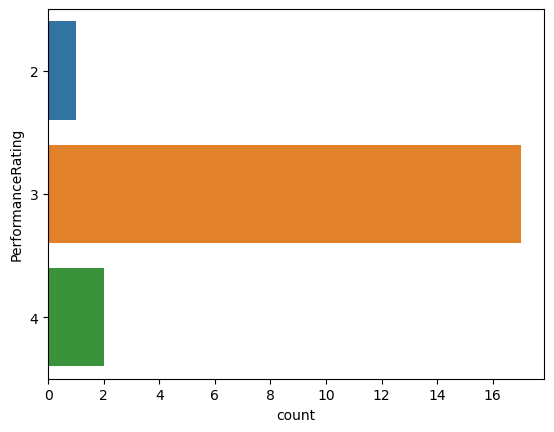

In [29]:
sns.countplot(y="PerformanceRating", data=Data_Science);

### Insights: 
* In Data science department, seventeen employees performance rating was excellent, two are outstanding performance and one employee performance was good.

## Performance Rating with respect to EmpLastSalaryHike Percent

Text(0.5, 1.0, 'EmpLastSalaryHikePercent by Performance Rating')

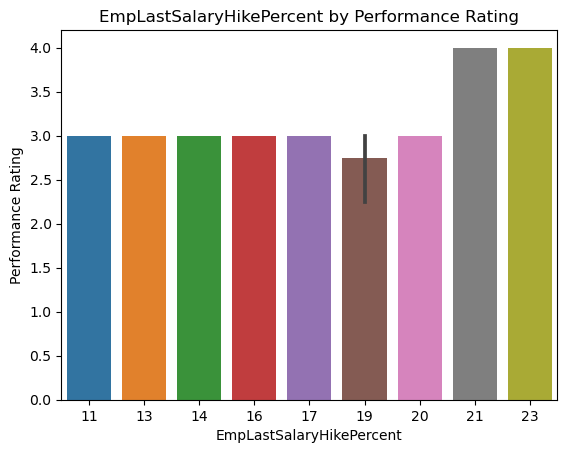

In [30]:
sns.barplot(x=Data_Science['EmpLastSalaryHikePercent'], y=Data_Science['PerformanceRating'])
plt.xlabel('EmpLastSalaryHikePercent')
plt.ylabel('Performance Rating')
plt.title('EmpLastSalaryHikePercent by Performance Rating')

### Insights:
* Employees who received a salary hike of more than 21% demonstrated excellent performance.

* In the Data Science department, other employees exhibited good performance despite the salary hike.

## Performance Rating with respect to EmpEnvironmentSatisfaction

Text(0.5, 1.0, 'EmpEnvironmentSatisfaction by Performance Rating')

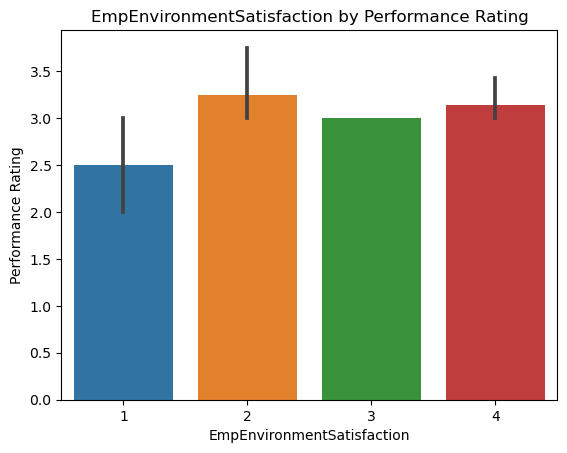

In [31]:
sns.barplot(x=Data_Science['EmpEnvironmentSatisfaction'], y=Data_Science['PerformanceRating'])
plt.xlabel('EmpEnvironmentSatisfaction')
plt.ylabel('Performance Rating')
plt.title('EmpEnvironmentSatisfaction by Performance Rating')

### Insights:
* Employees who are less satisfied with their work environment tend to have lower performance.

* Employees with higher satisfaction levels tend to exhibit improved performance.

## Performance Rating with respect to YearsSinceLastPromotion

Text(0.5, 1.0, 'YearsSinceLastPromotion by Performance Rating')

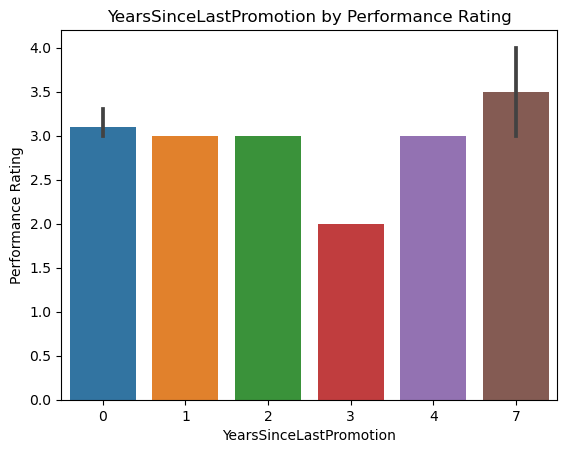

In [32]:
sns.barplot(x=Data_Science['YearsSinceLastPromotion'], y=Data_Science['PerformanceRating'])
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Performance Rating')
plt.title('YearsSinceLastPromotion by Performance Rating')

### Insights:
* Only employees who were promoted three years ago exhibited lower performance; all other employees demonstrated excellent performance.

## Performance Rating with respect to Experience Level

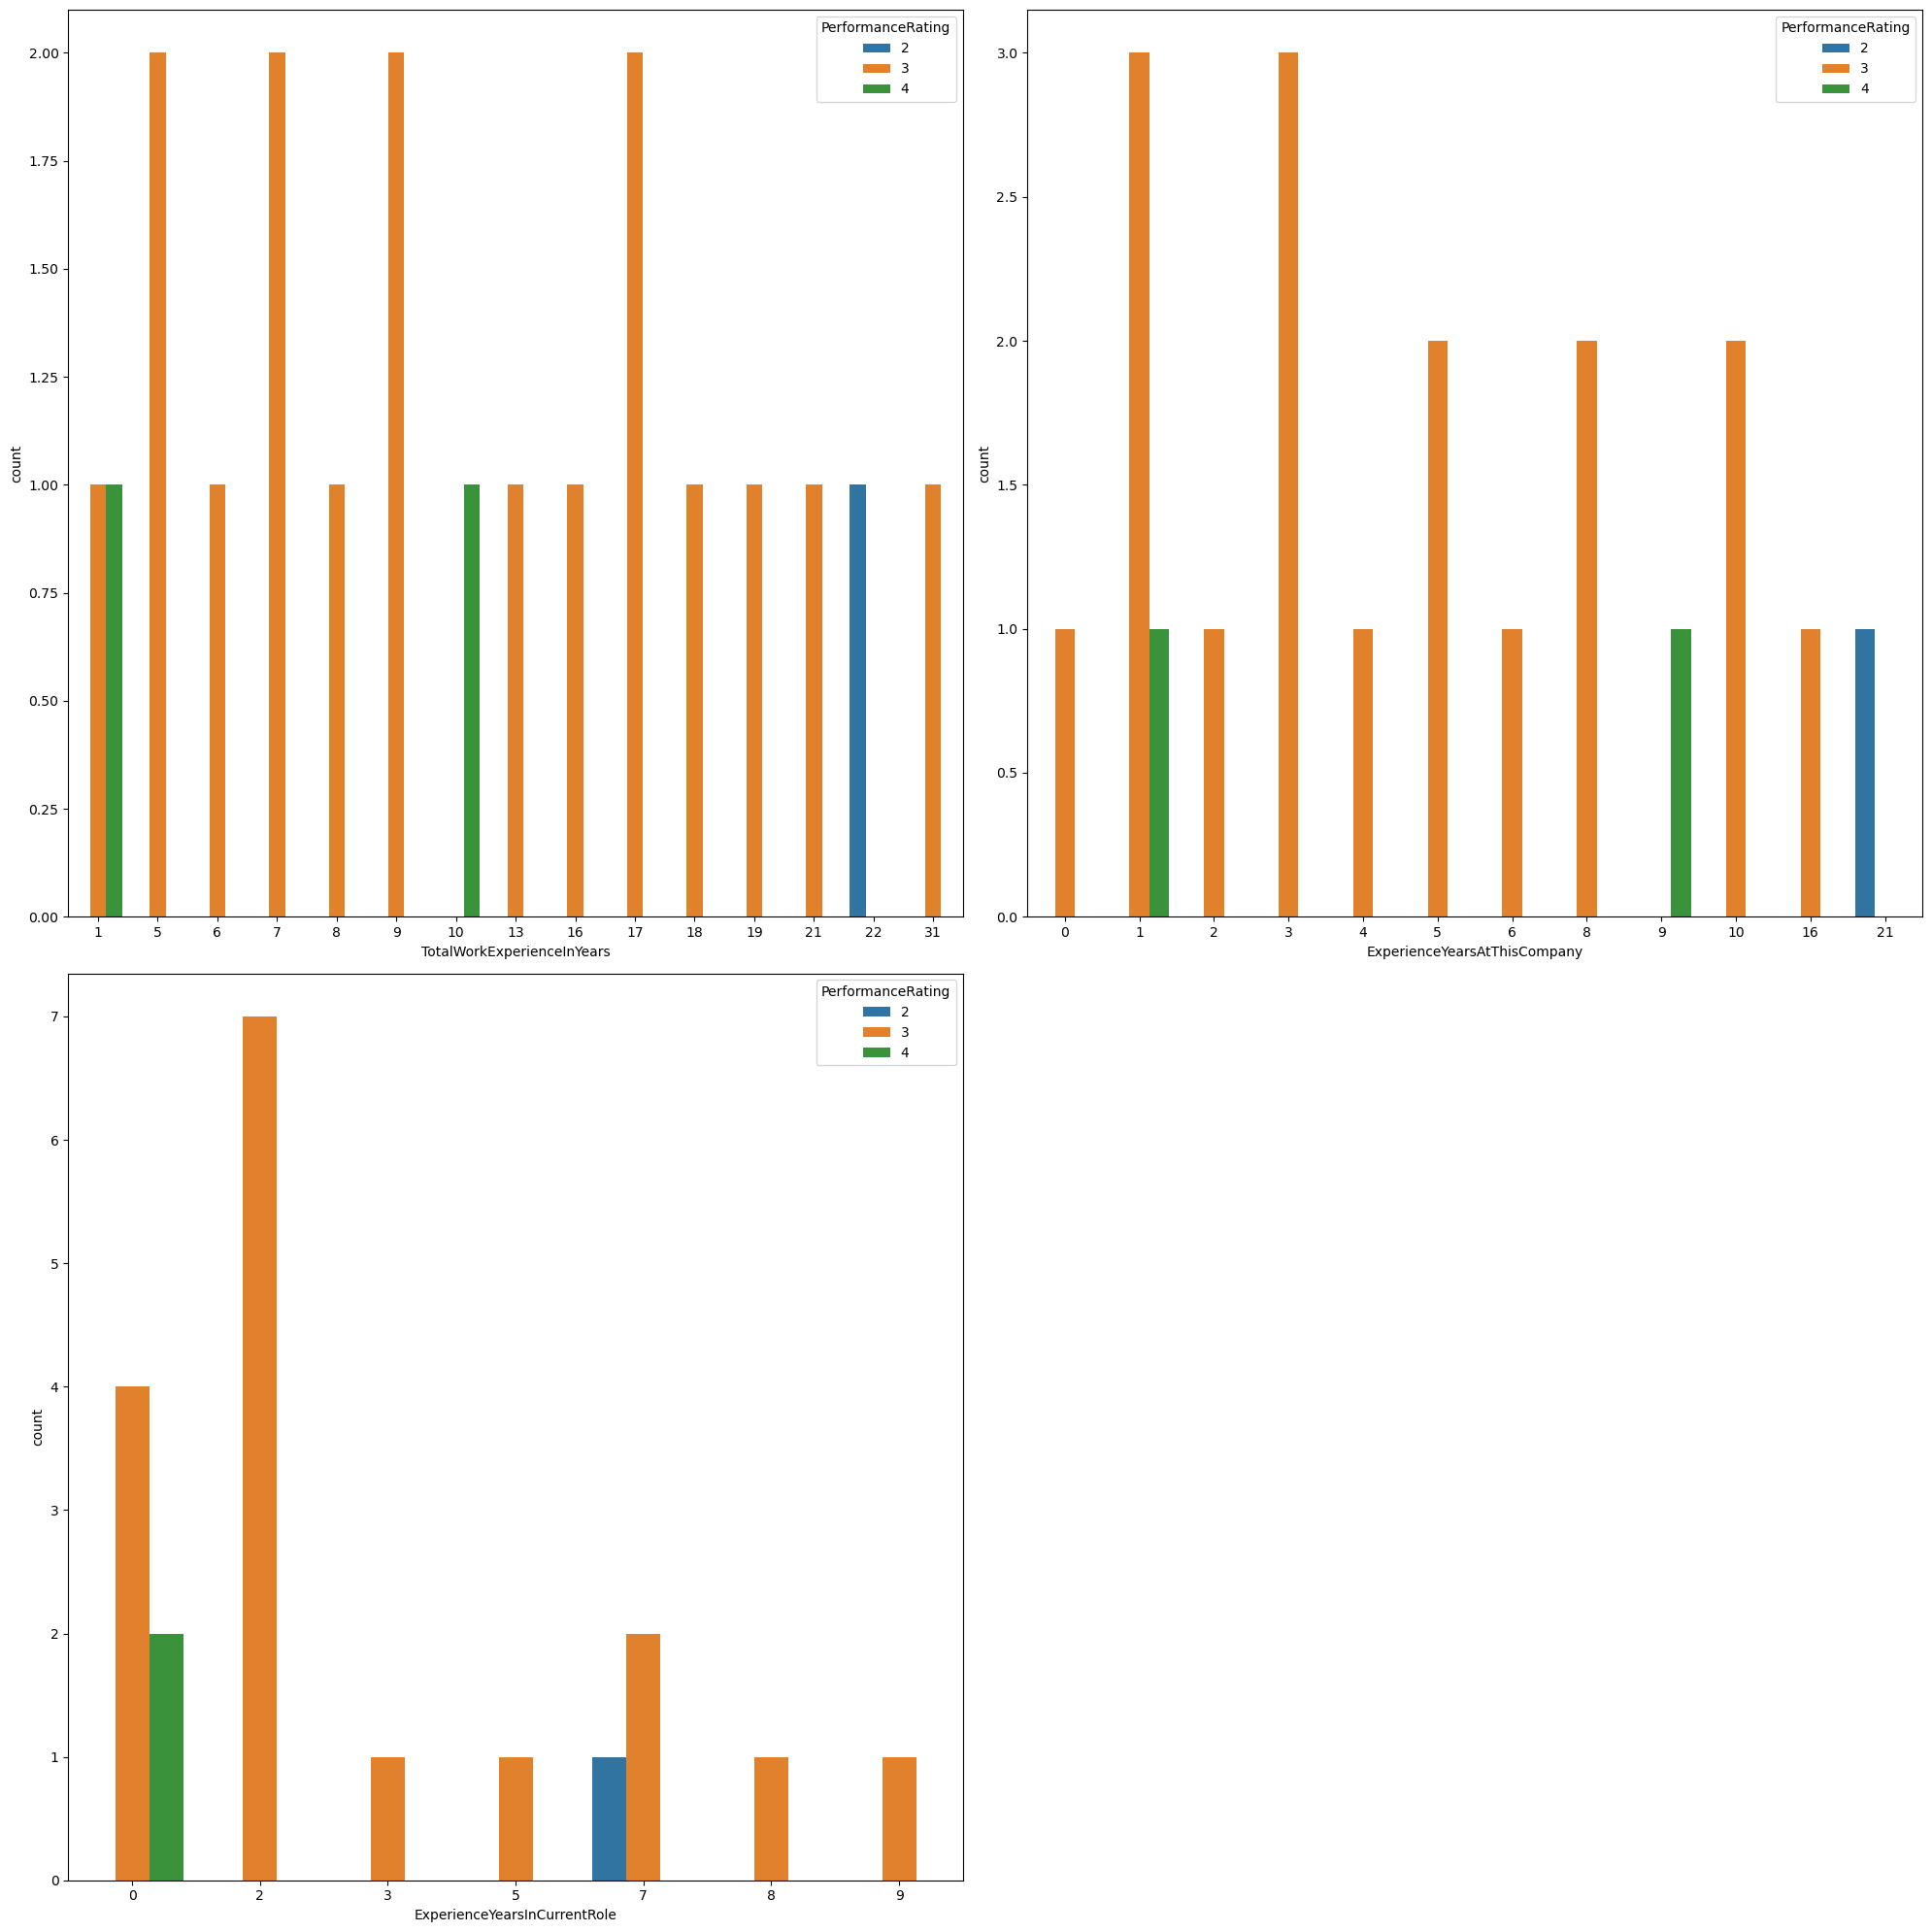

In [33]:
experience=Data_Science[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole']]
plt.figure(figsize=(20,20))
plotnumber=1
for i in experience:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(data=experience,x=Data_Science[i],hue=Data_Science['PerformanceRating'])
    plotnumber+=1
plt.tight_layout() 

### Insights:
* Total work experience in years: In the Data Science department, freshers are consistently delivering outstanding performance.

* Experience years in the current role: Employees who have been working in their current role for less than 2 years tend to show outstanding performance.

* Experience years at this company: Employees who have been working at the company for less than 3 years typically exhibit excellent performance.

## Research & Development Department

In [34]:
# fetching Research and development department from data
RD = data[data.EmpDepartment == 'Research & Development'] 
Dept5=RD.PerformanceRating.value_counts()
RD.PerformanceRating.value_counts()

3    234
2     68
4     41
Name: PerformanceRating, dtype: int64

## Performance Rating with respect to Number of Employees

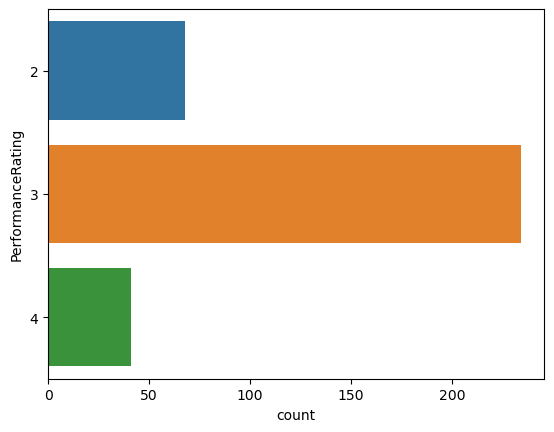

In [35]:
sns.countplot(y="PerformanceRating", data=RD);

### Insights:
* In the R&D department, 234 employees demonstrated excellent performance.

* 68 employees in the R&D department had good performance.

* 41 employees in the R&D department exhibited outstanding performance.

## Performance Rating with respect to EmpLastSalaryHike Percent

Text(0.5, 1.0, 'EmpLastSalaryHikePercent by Performance Rating')

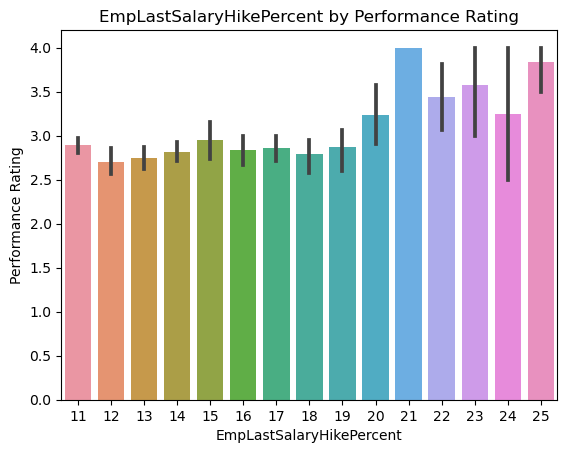

In [36]:
sns.barplot(x=RD['EmpLastSalaryHikePercent'], y=RD['PerformanceRating'])
plt.xlabel('EmpLastSalaryHikePercent')
plt.ylabel('Performance Rating')
plt.title('EmpLastSalaryHikePercent by Performance Rating')

### Insights:
* As salary hike percent increases employee performance also increases in R&D department.

## Performance Rating with respect to EmpEnvironmentSatisfaction

Text(0.5, 1.0, 'EmpEnvironmentSatisfaction by Performance Rating')

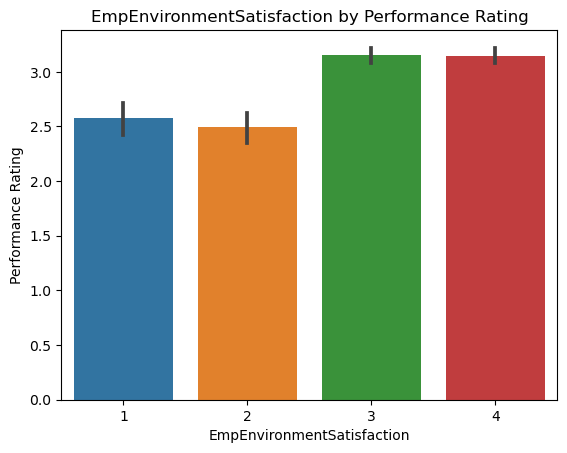

In [37]:
sns.barplot(x=RD['EmpEnvironmentSatisfaction'], y=RD['PerformanceRating'])
plt.xlabel('EmpEnvironmentSatisfaction')
plt.ylabel('Performance Rating')
plt.title('EmpEnvironmentSatisfaction by Performance Rating')

### Insights:
* In R&D department employees with high and very high satisfaction with environment, their performance was excellent.

## Performance Rating with respect to YearsSinceLastPromotion

Text(0.5, 1.0, 'YearsSinceLastPromotion by Performance Rating')

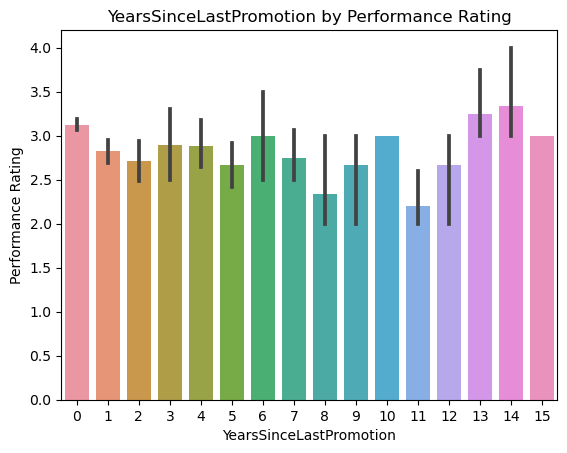

In [38]:
sns.barplot(x=RD['YearsSinceLastPromotion'], y=RD['PerformanceRating'])
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Performance Rating')
plt.title('YearsSinceLastPromotion by Performance Rating')

### Insights:
* Employees who were recently promoted and those who were promoted more than thirteen years ago demonstrated excellent performance.

* Employees who were promoted between eleven and twelve years ago exhibited good performance.

## Performance Rating with respect to Experience Level

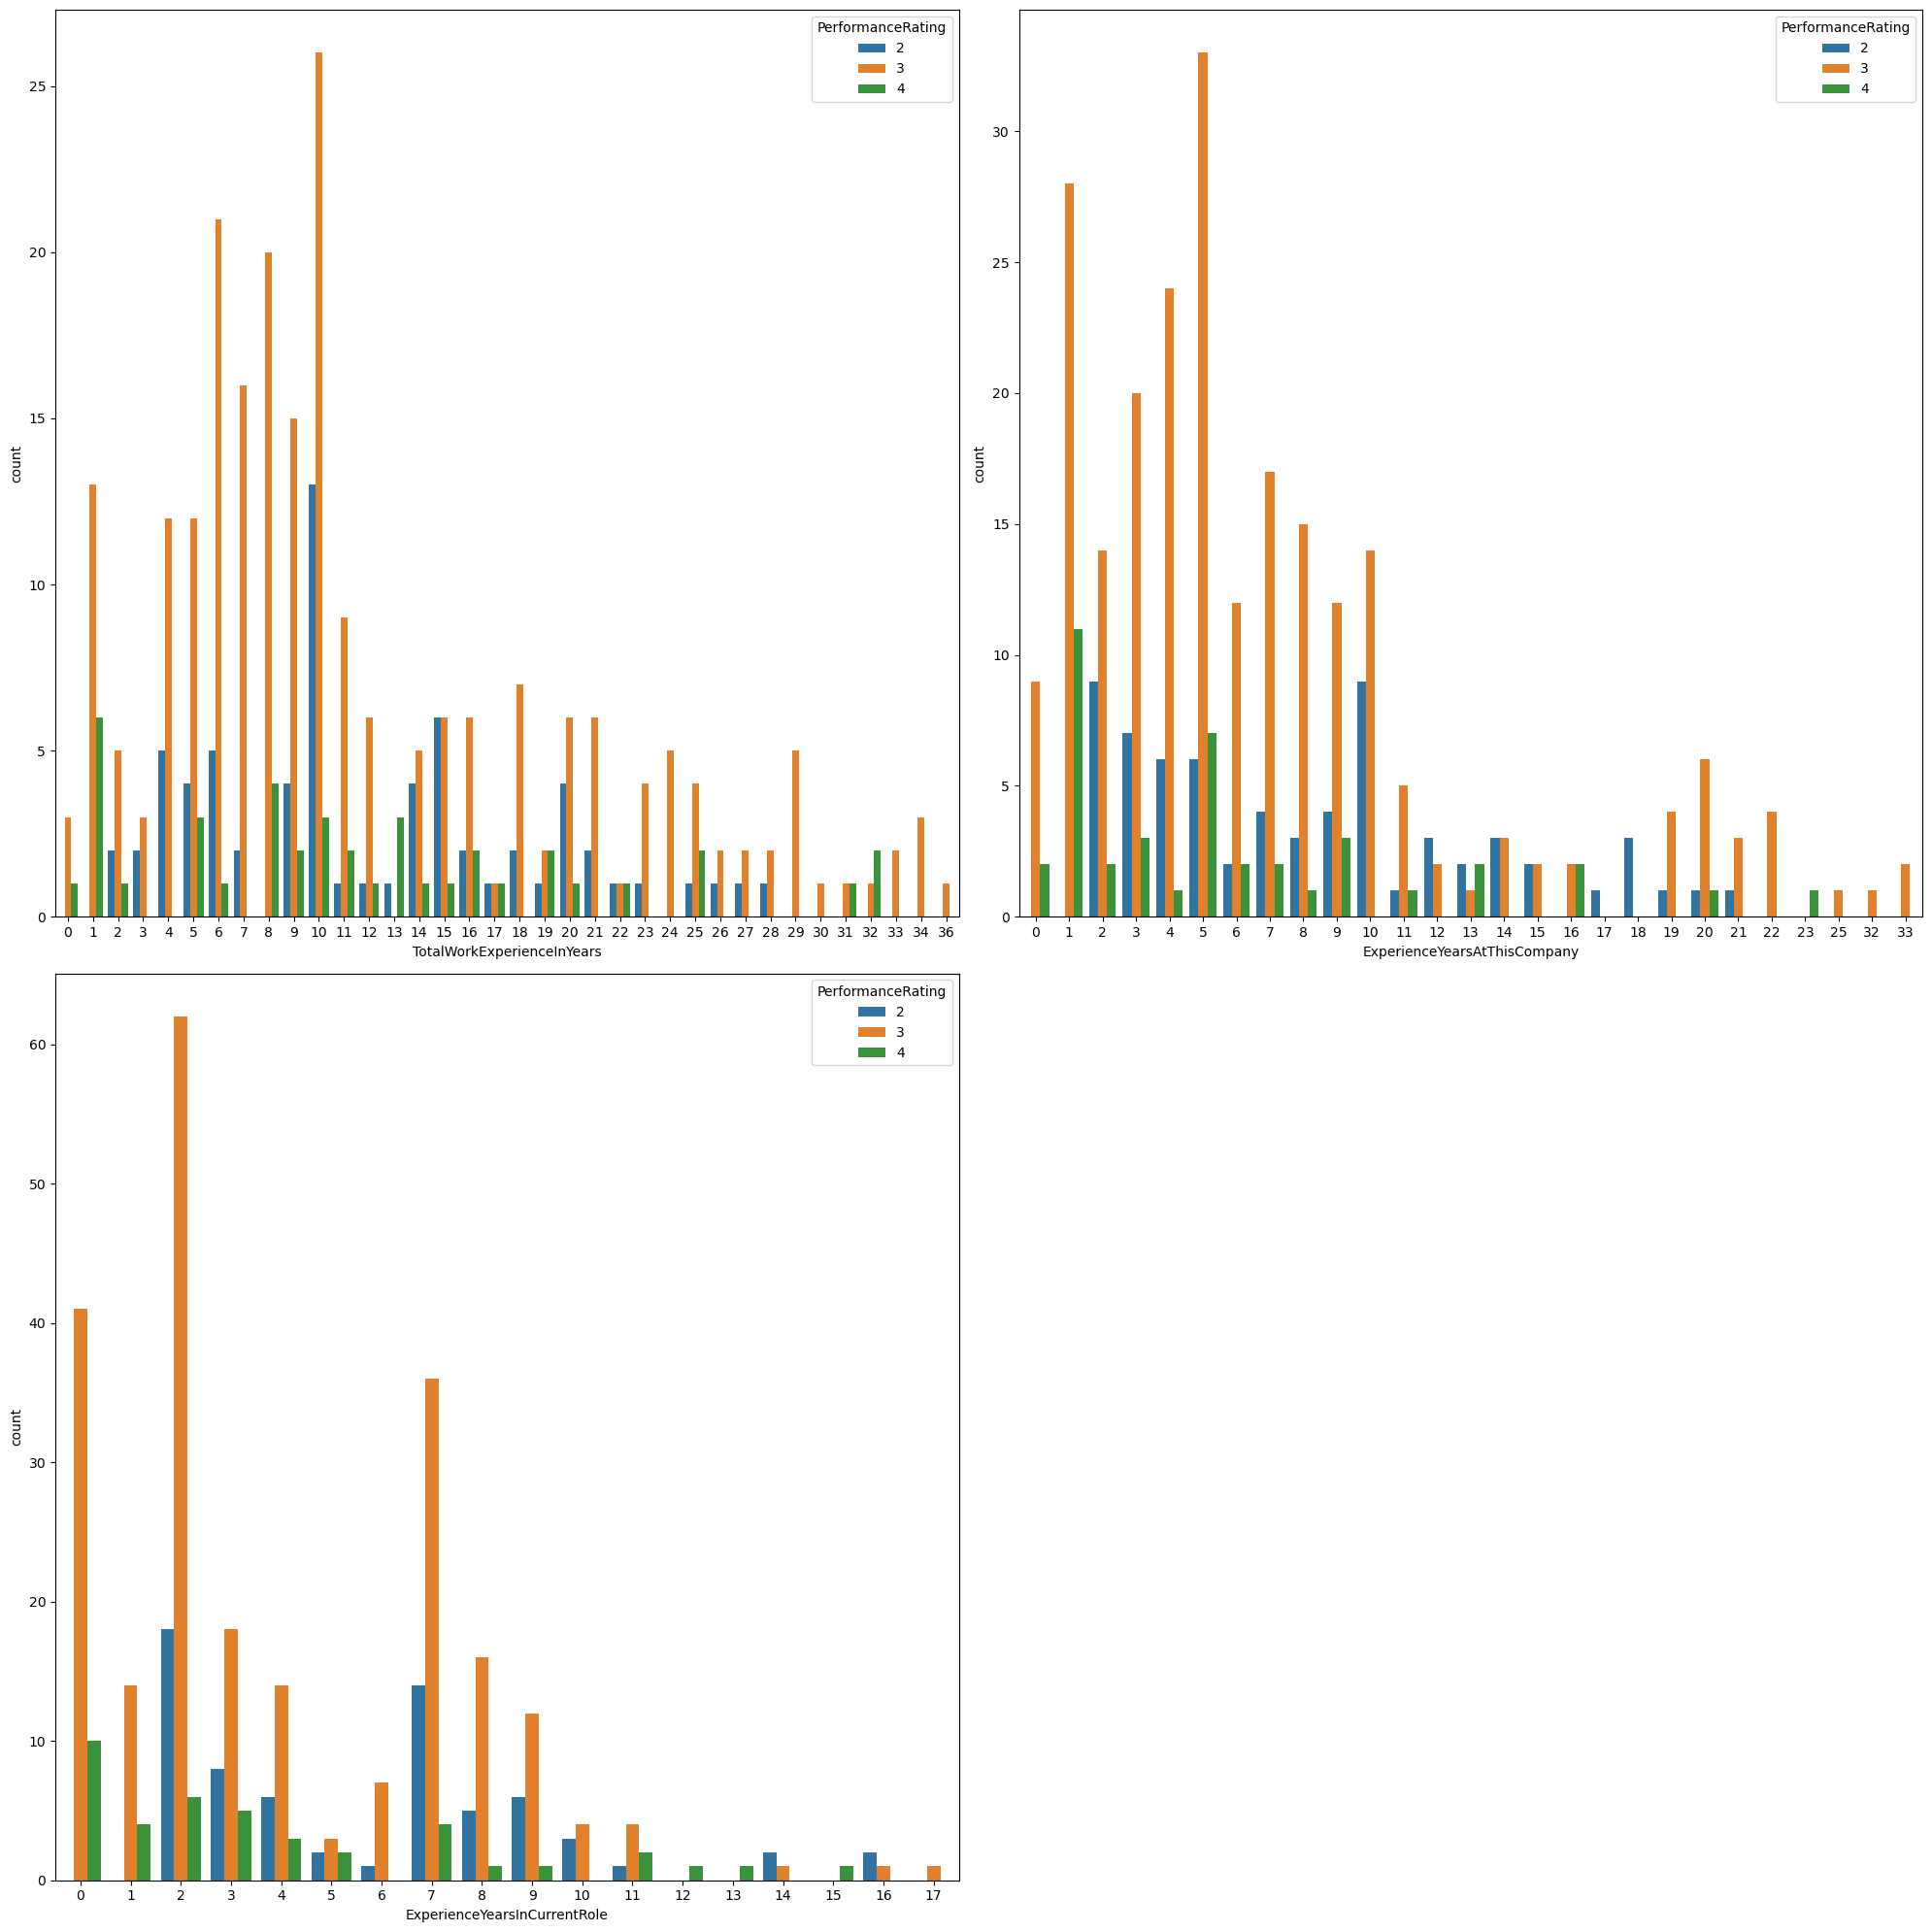

In [39]:
experience=RD[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole']]
plt.figure(figsize=(20,20))
plotnumber=1
for i in experience:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(data=experience,x=RD[i],hue=RD['PerformanceRating'])
    plotnumber+=1
plt.tight_layout() 

## Insights:
* Total work experience in years: Employees with less than 22 years of work experience tend to perform at a higher level.

* Experience years in the current role: Employees who have been working in their current role for less than 5 years consistently achieve outstanding performance.

* Experience years at this company: Employees who have been working at this company for 0 to 9 years tend to demonstrate outstanding performance.

## Finance Department

In [40]:
# Fetching finance department from data
Finance = data[data.EmpDepartment == 'Finance']
Dept6=Finance.PerformanceRating.value_counts()
Finance.PerformanceRating.value_counts()

3    30
2    15
4     4
Name: PerformanceRating, dtype: int64

## Performance Rating with respect to Number of Employees

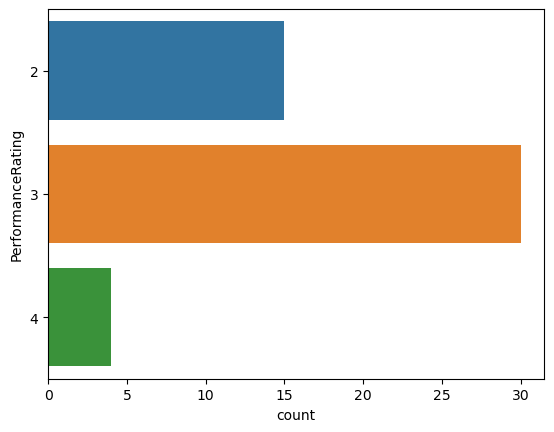

In [41]:
sns.countplot(y="PerformanceRating", data=Finance);

### Insights:
* In the Finance Department, 30 employees had excellent performance, 15 employees had good performance, and 4 employees had outstanding performance."

## Performance Rating with respect to EmpLastSalaryHike Percent

Text(0.5, 1.0, 'EmpLastSalaryHikePercent by Performance Rating')

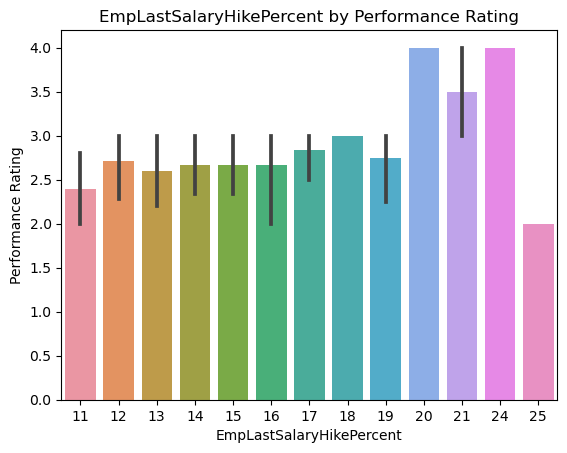

In [42]:
sns.barplot(x=Finance['EmpLastSalaryHikePercent'], y=Finance['PerformanceRating'])
plt.xlabel('EmpLastSalaryHikePercent')
plt.ylabel('Performance Rating')
plt.title('EmpLastSalaryHikePercent by Performance Rating')

### Insights:
* In the Finance department, as salary hikes increase, employee performance also increases."

## Performance Rating with respect to EmpEnvironmentSatisfaction

Text(0.5, 1.0, 'EmpEnvironmentSatisfaction by Performance Rating')

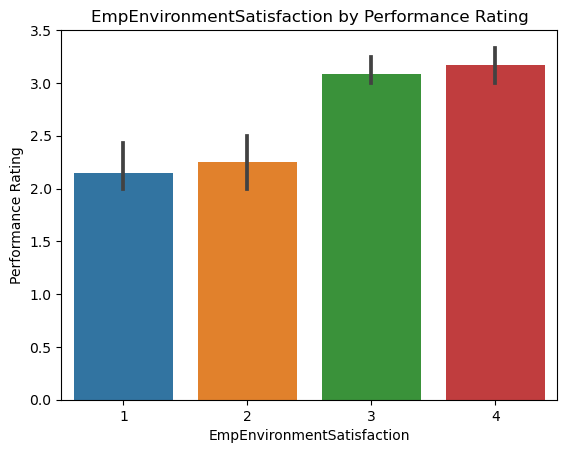

In [43]:
sns.barplot(x=Finance['EmpEnvironmentSatisfaction'], y=Finance['PerformanceRating'])
plt.xlabel('EmpEnvironmentSatisfaction')
plt.ylabel('Performance Rating')
plt.title('EmpEnvironmentSatisfaction by Performance Rating')

### Insights:
* In the Finance department, employees with high and very high levels of satisfaction with their work environment demonstrated excellent performance.

## Performance Rating with respect to YearsSinceLastPromotion

Text(0.5, 1.0, 'YearsSinceLastPromotion by Performance Rating')

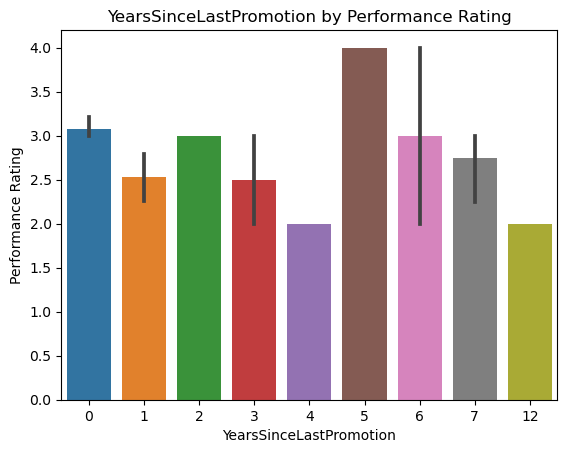

In [44]:
sns.barplot(x=Finance['YearsSinceLastPromotion'], y=Finance['PerformanceRating'])
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Performance Rating')
plt.title('YearsSinceLastPromotion by Performance Rating')

### Insights:
* Employees who were promoted more than 5 years ago demonstrated outstanding performance.
* Employees who were recently promoted exhibited excellent performance.

## Performance Rating with respect to Experience Level

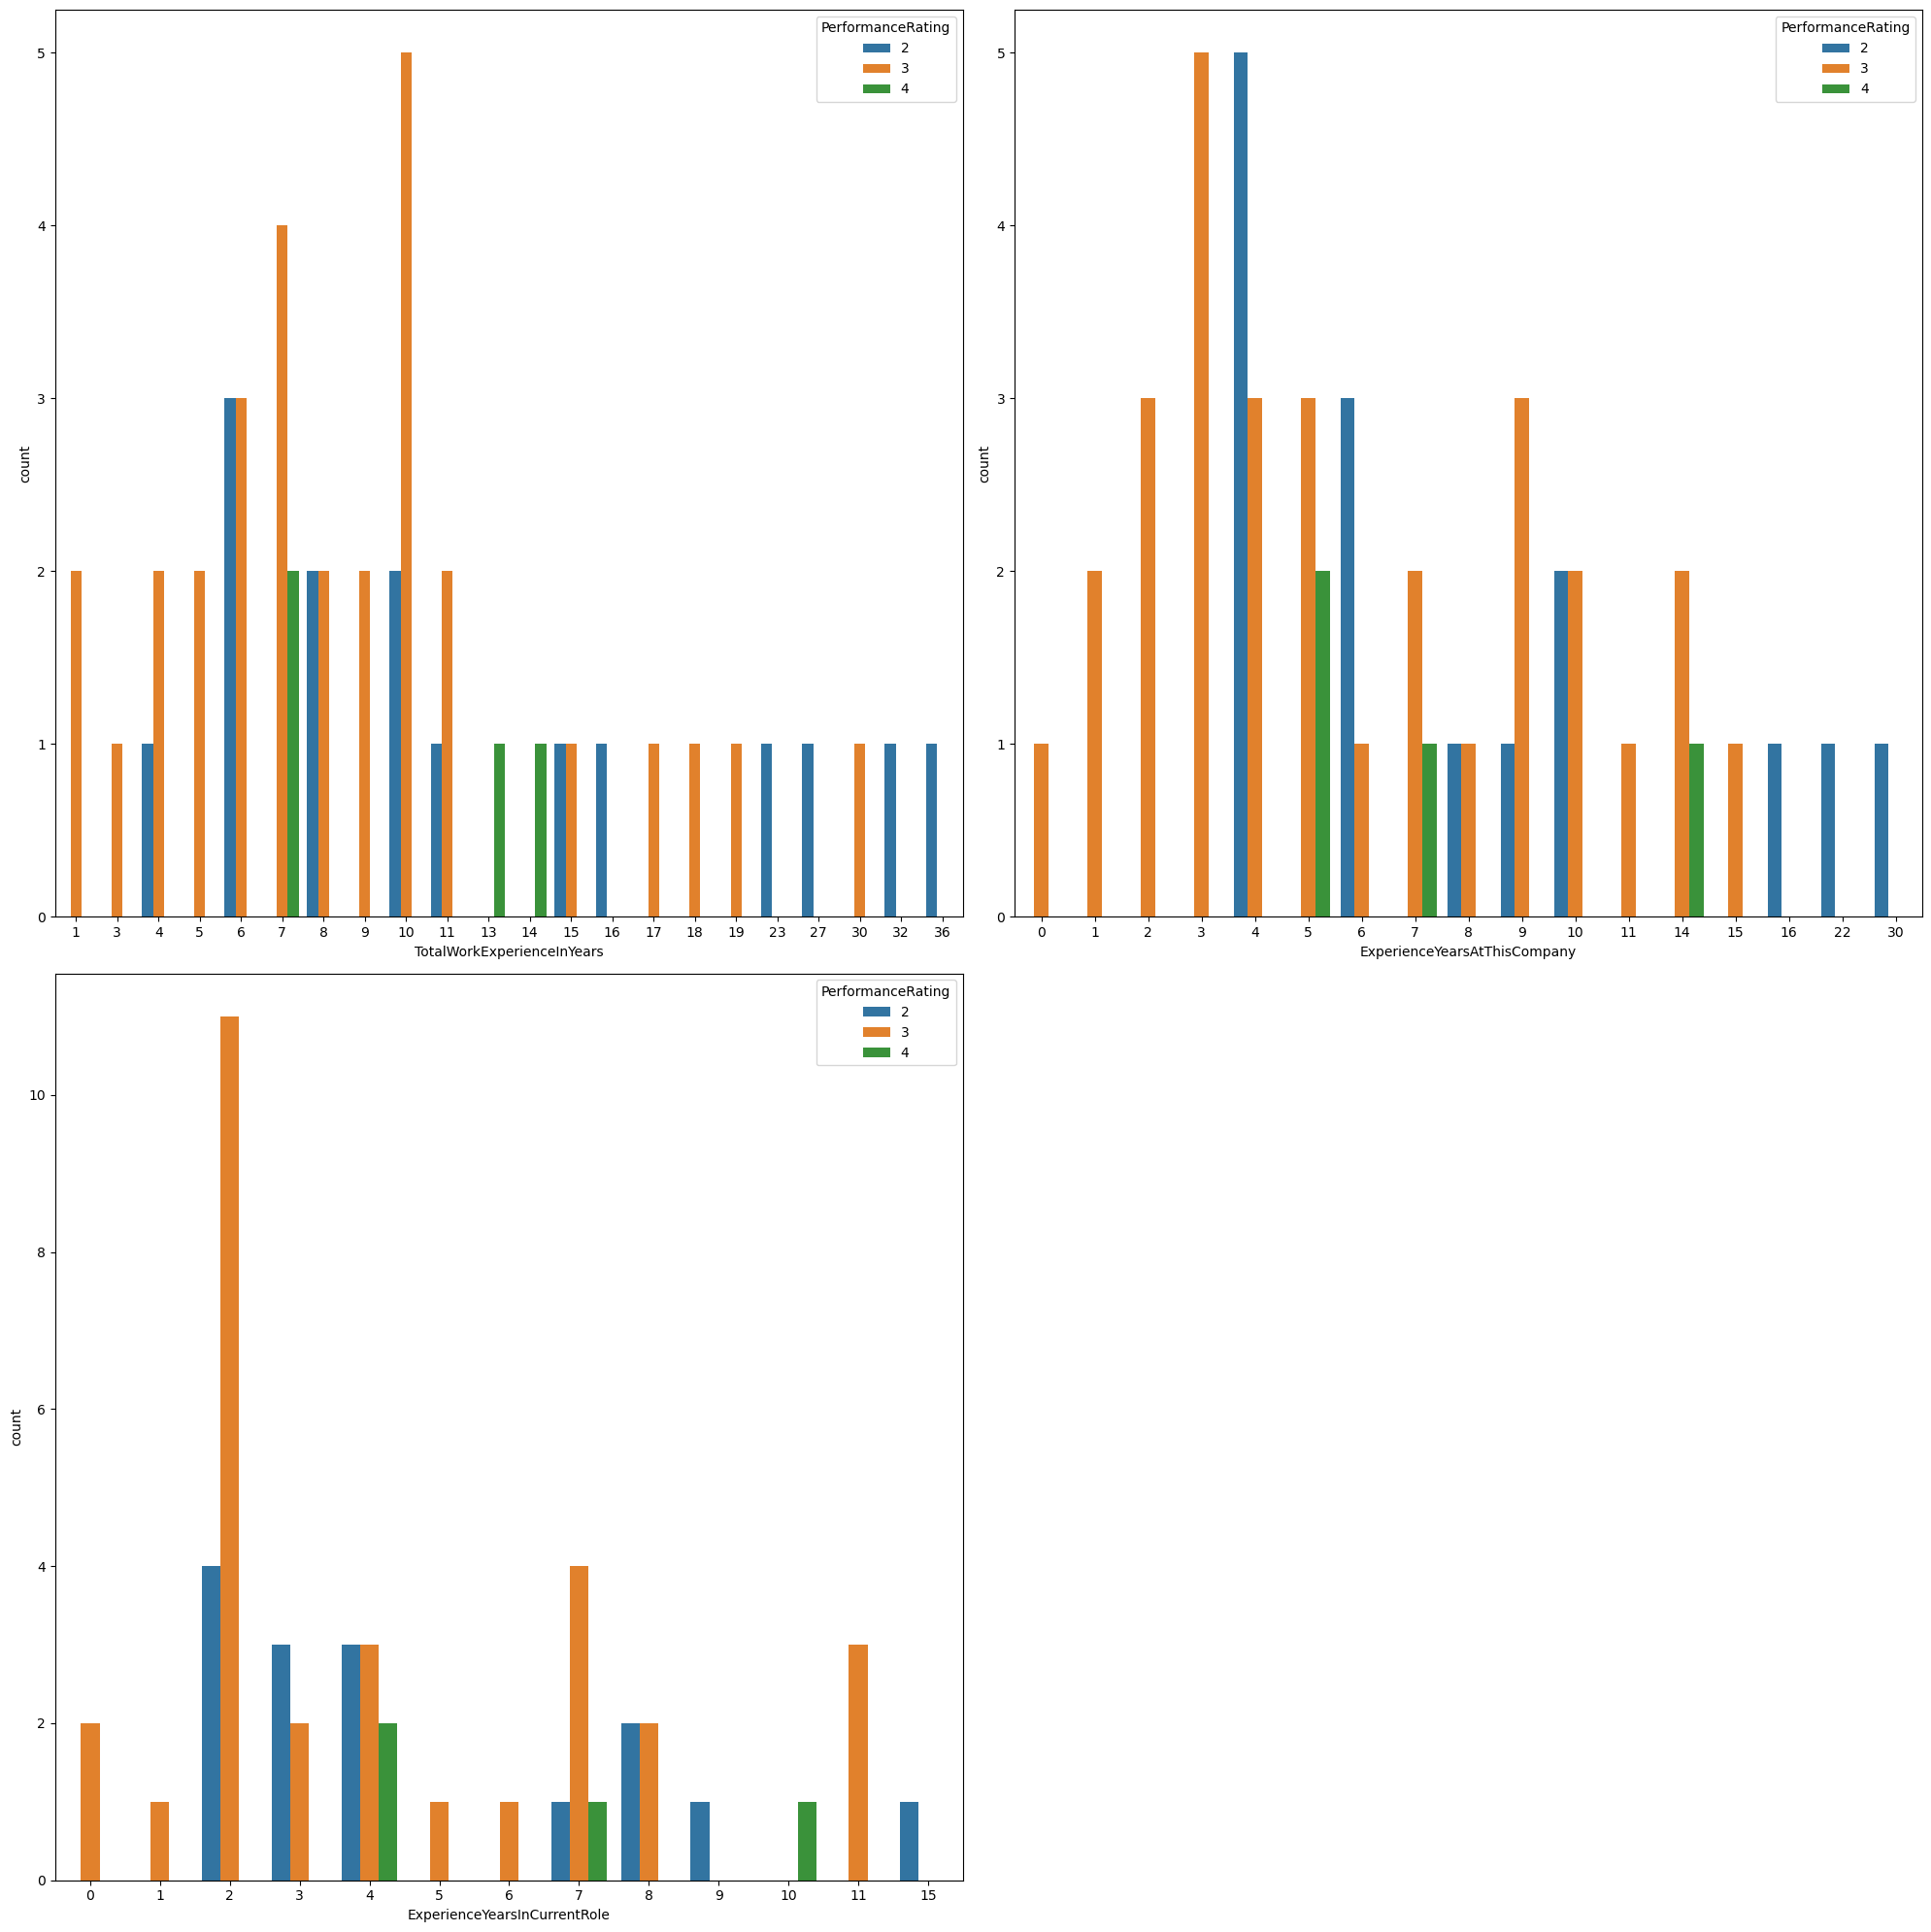

In [49]:
experience=Finance[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole']]
plt.figure(figsize=(20,20))
plotnumber=1
for i in experience:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(data=experience,x=Finance[i],hue=Finance['PerformanceRating'])
    plotnumber+=1
plt.tight_layout() 

## Insights:
* Total work experience in years: Within the Finance department, employees who have been working for more than 7 years consistently exhibit outstanding performance.

* Experience years in the current role: Employees who have been working in their current role for more than 4 years tend to have an excellent performance record.

* Experience years at this company: Employees who have been with this company for more than 5 years tend to demonstrate outstanding performance.

# Conclusions from Department vs. Performance Rating


In [46]:
# Create the DataFrame
table1 = [Dept1, Dept2, Dept3, Dept4, Dept5, Dept6]
Dept_Performance = pd.DataFrame(table1, index=['Sales', 'HR', 'Development', 'Data Science', 'R&D', 'Finance'])

# Add a "Total" column
Dept_Performance['Total'] = Dept_Performance.sum(axis=1)


# Calculate the sum row
sum_row = Dept_Performance.sum(axis=0)
Dept_Performance.loc['Sum'] = sum_row

# Calculate the percentage columns
Dept_Performance['Percentage'] = (Dept_Performance['Total'] / sum_row['Total']) * 100

# Calculate the percentage row
percentage_row = (sum_row / sum_row['Total']) * 100

# Append the percentage row to the DataFrame
Dept_Performance = Dept_Performance.append(pd.Series(percentage_row, name='Percentage'))

# Display the DataFrame
Dept_Performance

,3,2,4,Total,Percentage
Sales,251.000000,87.000000,35.0,373.0,31.083333
HR,38.000000,10.000000,6.0,54.0,4.500000
Development,304.000000,13.000000,44.0,361.0,30.083333
Data Science,17.000000,1.000000,2.0,20.0,1.666667
R&D,234.000000,68.000000,41.0,343.0,28.583333
Finance,30.000000,15.000000,4.0,49.0,4.083333
Sum,874.000000,194.000000,132.0,1200.0,100.000000
Percentage,72.833333,16.166667,11.0,100.0,NaN


* **From the table, we can conclude that the dataset contains 31% of employees from the Sales department, 30% from the Development department, and 28% from the Research & Development department, followed by 4% from HR and Finance, and 1.6% from Data Science**

* **According to the data analysis, 72% of employees were rated as having excellent performance, 16% were rated as having good performance, and 11% had outstanding performance.**

* **Overall Development and Research & Development department performance was higher than other departments**.

* **In the Finance and HR Departments, employees with less than 2 years of experience, including freshers, tend to have lower performance levels**

* **In the Sales, R&D, and Development departments, employees with over 15 years of experience have not performed well.**

* **The analysis indicates that as the salary hike percentage increases, employee performance also increases.**

* **The analysis further shows that as the level of employee environment satisfaction increases, employee performance also improves.**

* **Employees who have recently received promotions demonstrate excellent performance.**

## Finding Non-Performing Employees

In [47]:
# finding employees whose performance is low based on the three important features impacting the performance of employees
less_performance=data.loc[(data['PerformanceRating']==2) & (data['Attrition']=='No') & (data['EmpEnvironmentSatisfaction']==1)
                            & (data['EmpLastSalaryHikePercent']<14)  & (data['YearsSinceLastPromotion']>3)]
less_performance

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
227,E1001402,46,Male,Marketing,Married,Sales,Manager,Travel_Rarely,3,1,...,4,23,3,3,12,9,4,9,No,2
288,E1001516,33,Male,Medical,Married,Research & Development,Research Scientist,Travel_Rarely,9,3,...,2,15,5,3,14,10,4,10,No,2
293,E1001524,44,Female,Life Sciences,Married,Research & Development,Manager R&D,Travel_Rarely,2,1,...,4,10,5,3,10,5,7,7,No,2
420,E1001758,42,Female,Medical,Single,Research & Development,Laboratory Technician,Travel_Frequently,9,2,...,3,12,3,3,12,9,5,8,No,2
457,E1001826,40,Male,Medical,Married,Sales,Sales Executive,Travel_Rarely,9,2,...,4,9,5,4,8,4,7,1,No,2
462,E1001831,45,Male,Technical Degree,Divorced,Research & Development,Healthcare Representative,Travel_Rarely,1,4,...,1,10,4,3,10,8,7,7,No,2
655,E1002170,40,Male,Life Sciences,Divorced,Research & Development,Manager R&D,Travel_Rarely,1,4,...,1,22,3,3,19,7,11,16,No,2
809,E100351,33,Female,Life Sciences,Single,Development,Developer,Travel_Frequently,1,2,...,3,15,1,3,15,14,8,12,No,2
817,E100359,59,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,25,3,...,4,28,3,2,21,16,7,9,No,2
1160,E100922,50,Male,Medical,Married,Human Resources,Manager,Travel_Frequently,3,3,...,3,32,2,3,32,5,10,7,No,2


**Based on the findings, there are 10 employees with performance issues who may receive penalties or final warnings.**